In [38]:
import pandas as pd
pd.set_option('display.max_columns', 3000)
pd.set_option('display.max_rows', 5000)

import warnings
warnings.filterwarnings('ignore')

#Extend cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [39]:
df = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2.csv")
df.drop(columns="index",inplace=True)

In [40]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,Kenmore,NY,14217,KEYBANK NATIONAL ASSOCIATION,OH,561720,112,1.0,0,0,1,1,N,N,45500.0,0.0,45500.0,22750.0,0
800251,MENOMONEE FALLS,WI,53051,WAUKESHA STATE BANK,WI,337110,75,1.0,0,75,1,1,0,N,550000.0,0.0,550000.0,412500.0,0
800252,LONGVIEW,TX,75604,CAPITAL ONE NATL ASSOC,VA,517310,2,1.0,0,0,1,1,0,Y,128800.0,0.0,135000.0,114750.0,0
800253,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,RI,447110,4,2.0,0,0,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0


In [41]:
df.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1381
BankState            1386
NAICS                   0
NoEmp                   0
NewExist              127
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr            4016
LowDoc               2316
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [42]:
#show unique values in each column and its data type
for col in df.columns:
    print(f'{col} unique values are {df[col].unique()}')
    print("\n")
    print(f'{col} data type is {df[col].dtype}')

City unique values are ['NEW YORK' 'PAWTUCKET' 'ISSAQUAH' ... 'ST  FRANCIS' 'Stevens point'
 'Pylesville']


City data type is object
State unique values are ['NY' 'RI' 'WA' 'TX' 'CA' 'NC' 'MN' 'MO' 'FL' 'IA' 'IL' 'DC' 'PA' 'AL'
 'MS' 'OH' 'MA' 'NJ' 'ME' 'NV' 'LA' 'MI' 'IN' 'GA' 'UT' 'VA' 'WI' 'TN'
 'KS' 'NH' 'CO' 'CT' 'KY' 'AZ' 'ID' 'DE' 'SD' 'AR' 'MD' 'OK' 'SC' 'NM'
 'MT' 'NE' 'OR' 'WY' 'AK' 'HI' 'VT' 'ND' 'WV' nan]


State data type is object
Zip unique values are [10003  2860 98027 ... 78944 17814 95812]


Zip data type is int64
Bank unique values are ['JPMORGAN CHASE BANK NATL ASSOC' 'CITIZENS BANK NATL ASSOC'
 'FIRST-CITIZENS BK & TR CO' ... 'TULSA NATIONAL BANCSHARES, INC'
 'BEACH PLAZA LLC' 'THE LEADERS BANK']


Bank data type is object
BankState unique values are ['IL' 'RI' 'WA' 'CA' 'NC' 'MN' 'MO' 'OR' 'FL' 'IA' 'SD' 'DC' 'TX' 'PA'
 'VA' 'AL' 'OH' 'MS' 'IN' 'MA' 'ME' 'MI' 'DE' 'UT' 'SC' 'NY' 'KS' 'CO'
 'LA' 'WI' 'CT' 'AZ' 'AR' 'MD' 'OK' 'NM' 'ID' 'MT' 'NJ' 'KY' 'NE' 'WY'
 'GA

In [43]:
df

,City,State,Zip,Bank,BankState,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
0,NEW YORK,NY,10003,JPMORGAN CHASE BANK NATL ASSOC,IL,561439,9,1.0,1,9,1,1,0,N,68000.0,0.0,68000.0,34000.0,0
1,PAWTUCKET,RI,2860,CITIZENS BANK NATL ASSOC,RI,541810,8,1.0,4,12,0,1,N,N,90000.0,0.0,90000.0,45000.0,1
2,ISSAQUAH,WA,98027,FIRST-CITIZENS BK & TR CO,WA,448210,9,2.0,0,0,1,0,N,N,450000.0,0.0,450000.0,337500.0,0
3,HURST,TX,76053,WILSHIRE BANK,CA,722213,4,1.0,0,4,1,1,0,N,140000.0,0.0,165000.0,82500.0,0
4,ALPINE,CA,91901,CALIFORNIA BANK & TRUST,CA,233210,1,1.0,0,1,1,2,Y,N,50000.0,0.0,50000.0,25000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
800250,Kenmore,NY,14217,KEYBANK NATIONAL ASSOCIATION,OH,561720,112,1.0,0,0,1,1,N,N,45500.0,0.0,45500.0,22750.0,0
800251,MENOMONEE FALLS,WI,53051,WAUKESHA STATE BANK,WI,337110,75,1.0,0,75,1,1,0,N,550000.0,0.0,550000.0,412500.0,0
800252,LONGVIEW,TX,75604,CAPITAL ONE NATL ASSOC,VA,517310,2,1.0,0,0,1,1,0,Y,128800.0,0.0,135000.0,114750.0,0
800253,CAMDEN,NJ,8105,BANK OF AMERICA NATL ASSOC,RI,447110,4,2.0,0,0,1,1,Y,N,100000.0,0.0,100000.0,50000.0,0


In [44]:
for i in df['RevLineCr']:
    if i not in ['Y','N']:
        df['RevLineCr'].replace(i,'N',inplace=True)
print("RevLineCr",df['RevLineCr'].unique())

for i in df['LowDoc']:
    if i not in ['Y','N']:
        df['LowDoc'].replace(i,'N',inplace=True)
print("LowDoc",df['LowDoc'].unique())

for i in df['NewExist']:
    if i not in [1,2]:
        df['NewExist'].replace(i,None,inplace=True)
print("NewExist",df['NewExist'].unique())

RevLineCr ['N' 'Y']
LowDoc ['N' 'Y']
NewExist [1.0 2.0 None]


In [45]:
df.isnull().sum()

City                   26
State                  13
Zip                     0
Bank                 1381
BankState            1386
NAICS                   0
NoEmp                   0
NewExist             1057
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr               0
LowDoc                  0
DisbursementGross       0
BalanceGross            0
GrAppv                  0
SBA_Appv                0
MIS_Status              0
dtype: int64

In [46]:
category_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
for column in category_cols:
  df[column]=df[column].fillna(df[column].mode()[0])

In [47]:
df.isnull().sum()

City                 0
State                0
Zip                  0
Bank                 0
BankState            0
NAICS                0
NoEmp                0
NewExist             0
CreateJob            0
RetainedJob          0
FranchiseCode        0
UrbanRural           0
RevLineCr            0
LowDoc               0
DisbursementGross    0
BalanceGross         0
GrAppv               0
SBA_Appv             0
MIS_Status           0
dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df,test_size=0.2,random_state=42)
train.shape, test.shape

((640204, 19), (160051, 19))

``` Training set has 560178 rows and testing set has 240077 samples

Target encoding is a data preprocessing technique used to convert categorical variables into numerical values that can be used by machine learning algorithms. It works by replacing each category with the average value of the target variable for that category. This can be helpful for algorithms that cannot handle categorical variables directly.

In this case the target variable is "MIS_Status"```

In [49]:
#target encoder
import category_encoders as ce
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
categorical_columns = ['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist', 'UrbanRural']

encoder = ce.TargetEncoder(cols=categorical_columns)
encoder.fit(train, train['MIS_Status'])

train_encoded = encoder.transform(train)

# Renaming the columns
train_encoded = train_encoded.add_suffix('_trg')
train_encoded = pd.concat([train_encoded, train], axis=1)
for column in categorical_columns:
    train_encoded[column + "_trg"].fillna(train_encoded[column + "_trg"].mean(), inplace=True)

train_encoded.drop(columns=categorical_columns, inplace=True)
train_encoded.drop(columns='MIS_Status_trg', inplace=True)
train_encoded.head()


,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,FranchiseCode_trg,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross_trg,BalanceGross_trg,GrAppv_trg,SBA_Appv_trg,Zip,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
473658,0.311896,0.165712,43110,0.276163,0.223360,541921,2,0.170871,0,2,0,0.244557,0.152838,0.187475,25400.0,0.0,25400.0,12700.0,43110,541921,2,0,2,0,25400.0,0.0,25400.0,12700.0,0
778431,0.148794,0.165712,45371,0.175041,0.159471,541320,3,0.170871,0,3,0,0.187843,0.253428,0.187475,41882.0,0.0,25000.0,12500.0,45371,541320,3,0,3,0,41882.0,0.0,25000.0,12500.0,0
509938,0.152428,0.186924,92123,0.084951,0.219710,447110,1,0.170871,4,4,85304,0.244557,0.152838,0.187475,602000.0,0.0,602000.0,451500.0,92123,447110,1,4,4,85304,602000.0,0.0,602000.0,451500.0,0
651625,0.144928,0.188710,75081,0.142174,0.179305,0,15,0.186933,0,0,24957,0.244557,0.152838,0.187475,183500.0,0.0,183500.0,137625.0,75081,0,15,0,0,24957,183500.0,0.0,183500.0,137625.0,0
526142,0.134538,0.147593,96817,0.549263,0.219710,713940,10,0.170871,1,10,1,0.244557,0.152838,0.187475,5000.0,0.0,5000.0,4250.0,96817,713940,10,1,10,1,5000.0,0.0,5000.0,4250.0,1


In [50]:

test_encoded = encoder.transform(test)
test_encoded = test_encoded.add_suffix('_trg')
test_encoded = pd.concat([test_encoded, test], axis=1)
for column in categorical_columns:
    test_encoded[column + "_trg"].fillna(test_encoded[column + "_trg"].mean(), inplace=True)

test_encoded.drop(columns=categorical_columns, inplace=True)
test_encoded.drop(columns='MIS_Status_trg', inplace=True)
test_encoded.head()

,City_trg,State_trg,Zip_trg,Bank_trg,BankState_trg,NAICS_trg,NoEmp_trg,NewExist_trg,CreateJob_trg,RetainedJob_trg,FranchiseCode_trg,UrbanRural_trg,RevLineCr_trg,LowDoc_trg,DisbursementGross_trg,BalanceGross_trg,GrAppv_trg,SBA_Appv_trg,Zip,NAICS,NoEmp,CreateJob,RetainedJob,FranchiseCode,DisbursementGross,BalanceGross,GrAppv,SBA_Appv,MIS_Status
384386,0.140612,0.197919,12953,0.367531,0.168015,0,5,0.170871,0,0,1,0.070732,0.152838,0.187475,420000.0,0.0,420000.0,315000.0,12953,0,5,0,0,1,420000.0,0.0,420000.0,315000.0,0
662652,0.136187,0.197919,14850,0.094340,0.168015,235920,7,0.170871,0,0,0,0.070732,0.152838,0.187475,165000.0,0.0,165000.0,140250.0,14850,235920,7,0,0,0,165000.0,0.0,165000.0,140250.0,0
269020,0.149920,0.138693,98004,0.175041,0.159471,0,17,0.170871,0,0,1,0.070732,0.152838,0.187475,65000.0,0.0,65000.0,52000.0,98004,0,17,0,0,1,65000.0,0.0,65000.0,52000.0,0
752306,0.224138,0.275144,33905,0.112576,0.293824,541940,15,0.186933,15,0,1,0.244557,0.152838,0.187475,1125000.0,0.0,1125000.0,843750.0,33905,541940,15,15,0,1,1125000.0,0.0,1125000.0,843750.0,1
675193,0.335998,0.275144,33172,0.000000,0.160260,811111,4,0.170871,7,0,1,0.070732,0.152838,0.187475,240000.0,0.0,240000.0,240000.0,33172,811111,4,7,0,1,240000.0,0.0,240000.0,240000.0,0


StandardScaler in scikit-learn is a preprocessing technique that centers and scales numerical features such that they have a mean of zero and a standard deviation of one.

We will make use of the StandardScaler, which is used to transform both the training and test data in the same way, ensuring that the features have the same mean and standard deviation in both datasets.

Here we will scale it on the training set and transform on both training and testing

We have created Feature extraction by making use of old variables in the following way


(1) Log_Disbursement which gives the natural logarithmic form of DisbursementGross variable

(2) Log_GrAppv the logarithmic version of the approved loan amount by the bank

(3) Log_SBA_Appv, the logarithmic amount of the approved loan that will be assisted by SBA 

(4) Log_BalanceGross, is the logarithmic amount of total amount in an account or the total value of a financial asset or liability before any deductions or adjustments are made.

(5) TotalJobs variable which is an addition of Createjobs(New people recruited) and RetainedJob (workers working before)

(6) IncomeToLoan its values are calculated by dividing the 'DisbursementGross' column by the 'SBA_Appv' column for each corresponding row. This ratio can help you analyze the relationship between the amount disbursed and the approved SBA loan amount in terms of income.

(7)  EmployeesToLoanRatio, its values are calculated by dividing the 'NoEmp' column (number of employees) by the 'SBA_Appv' column (approved SBA loan amount) for each corresponding row. This ratio can help you analyze the relationship between the number of employees and the size of the SBA loan approved for each entry in the dataset.

(8) JobPerLoan, its values are calculated by dividing the 'TotalJobs' column (representing the total number of jobs) by the 'SBA_Appv' column (approved SBA loan amount) for each corresponding row. This ratio can help you analyze the impact of the SBA loan on job creation or support, expressed as the number of jobs per unit of loan amount approved.

(9) Gauren_SBA_Appv, Its values are calculated by dividing the 'GrAppv' column (gross amount approved by the lender) by the 'SBA_Appv' column (the approved SBA loan amount) for each corresponding row. This ratio helps you analyze the extent to which the SBA is guaranteeing the loan relative to the total loan amount approved by the lender.

(10) DefaultRate, Finally, we create a new feature 'DefaultRate' in the 'train_encoded' DataFrame and set its value to the calculated default rate for the particular group of loans based on the "MIS_Status" variable. This feature will represent the percentage of loans in the group that are classified as defaults.

In [51]:
# Adding Features
import numpy as np
train_encoded['Log_DisbursementGross'] = np.log1p(train_encoded['DisbursementGross'])
train_encoded['Log_NoEmp'] = np.log1p(train_encoded['NoEmp'])
train_encoded['Log_GrAppv'] = np.log1p(train_encoded['GrAppv'])
train_encoded['Log_SBA_Appv'] = np.log1p(train_encoded['SBA_Appv'])
train_encoded['Log_BalanceGross'] = np.log1p(train_encoded['BalanceGross'])

# Binning 
train_encoded['Disbursement_Bins'] = pd.cut(train_encoded['DisbursementGross'], 
                                           bins=[-np.inf, 50000, 150000, np.inf], 
                                           labels=['Low', 'Medium', 'High'])

# Loan Efficiency
train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

# Guarantee Ratio
train_encoded['Guarantee_Ratio'] = train_encoded['SBA_Appv'] / train_encoded['GrAppv']

# Loan Guarantee Interaction
train_encoded['Loan_Guarantee_Interaction'] = train_encoded['SBA_Appv'] * train_encoded['GrAppv']

# Disbursement Squared
train_encoded['Disbursement_Squared'] = train_encoded['DisbursementGross'] ** 2

# Displaying the newly created features
train_encoded[['Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv','Disbursement_Bins', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']].head()


,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
473658,10.142544,1.098612,10.142544,9.449436,Low,8466.666667,0.50,3.225800e+08,6.451600e+08
778431,10.642635,1.386294,10.126671,9.433564,Low,10470.500000,0.50,3.125000e+08,1.754102e+09
509938,13.308014,0.693147,13.308014,13.020333,High,66888.888889,0.75,2.718030e+11,3.624040e+11
651625,12.119975,2.772589,12.119975,11.832295,High,183500.000000,0.75,2.525419e+10,3.367225e+10
526142,8.517393,2.397895,8.517393,8.354910,Low,416.666667,0.85,2.125000e+07,2.500000e+07


In [52]:

# Creating log-based features for the test dataset
test_encoded['Log_DisbursementGross'] = np.log1p(test_encoded['DisbursementGross'])
test_encoded['Log_NoEmp'] = np.log1p(test_encoded['NoEmp'])
test_encoded['Log_GrAppv'] = np.log1p(test_encoded['GrAppv'])
test_encoded['Log_SBA_Appv'] = np.log1p(test_encoded['SBA_Appv'])
test_encoded['Log_BalanceGross'] = np.log1p(test_encoded['BalanceGross'])

# Binning

test_encoded['Disbursement_Bins'] = pd.cut(test_encoded['DisbursementGross'],
                                             bins=[-np.inf, 50000, 150000, np.inf],
                                             labels=['Low', 'Medium', 'High'])

# Loan Efficiency
test_encoded['Loan_Efficiency'] = test_encoded['DisbursementGross'] / (test_encoded['CreateJob'] + test_encoded['RetainedJob'] + 1)  # Adding 1 to avoid division by zero

# Guarantee Ratio
test_encoded['Guarantee_Ratio'] = test_encoded['SBA_Appv'] / test_encoded['GrAppv']

# Loan Guarantee Interaction
test_encoded['Loan_Guarantee_Interaction'] = test_encoded['SBA_Appv'] * test_encoded['GrAppv']

# Disbursement Squared
test_encoded['Disbursement_Squared'] = test_encoded['DisbursementGross'] ** 2

# Displaying the newly created features
test_encoded[['Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv','Disbursement_Bins', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']].head()

,Log_DisbursementGross,Log_NoEmp,Log_GrAppv,Log_SBA_Appv,Disbursement_Bins,Loan_Efficiency,Guarantee_Ratio,Loan_Guarantee_Interaction,Disbursement_Squared
384386,12.948012,1.791759,12.948012,12.660331,High,420000.0,0.75,1.323000e+11,1.764000e+11
662652,12.013707,2.079442,12.013707,11.851189,High,165000.0,0.85,2.314125e+10,2.722500e+10
269020,11.082158,2.890372,11.082158,10.859018,Medium,65000.0,0.80,3.380000e+09,4.225000e+09
752306,13.933294,2.772589,13.933294,13.645613,High,70312.5,0.75,9.492188e+11,1.265625e+12
675193,12.388398,1.609438,12.388398,12.388398,High,30000.0,1.00,5.760000e+10,5.760000e+10


In [53]:
train_encoded.columns
test_encoded.columns

Index(['City_trg', 'State_trg', 'Zip_trg', 'Bank_trg', 'BankState_trg',
       'NAICS_trg', 'NoEmp_trg', 'NewExist_trg', 'CreateJob_trg',
       'RetainedJob_trg', 'FranchiseCode_trg', 'UrbanRural_trg',
       'RevLineCr_trg', 'LowDoc_trg', 'DisbursementGross_trg',
       'BalanceGross_trg', 'GrAppv_trg', 'SBA_Appv_trg', 'Zip', 'NAICS',
       'NoEmp', 'CreateJob', 'RetainedJob', 'FranchiseCode',
       'DisbursementGross', 'BalanceGross', 'GrAppv', 'SBA_Appv', 'MIS_Status',
       'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv',
       'Log_BalanceGross', 'Disbursement_Bins', 'Loan_Efficiency',
       'Guarantee_Ratio', 'Loan_Guarantee_Interaction',
       'Disbursement_Squared'],
      dtype='object')

In [54]:
X_train = train_encoded.copy()
X_test = test_encoded.copy()

In [55]:
y_train = X_train['MIS_Status']
X_train.drop(columns='MIS_Status', axis=1, inplace=True)
y_test = X_test['MIS_Status']
X_test.drop(columns='MIS_Status', axis=1, inplace=True)

In [56]:
import lightgbm as lgb
from sklearn.metrics import roc_auc_score

train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
test_data = lgb.Dataset(data=X_test, label=y_test, params={"verbose":-1})
lgb_clf = lgb.train(params={"verbose":-1},
                    train_set=train_data)

In [57]:
from sklearn.metrics import roc_auc_score
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))

AUC score on Test dataset: 0.8218313161167985
AUC score on Train dataset: 0.8471117125599129


In [63]:
from optuna.integration import LightGBMPruningCallback
import tqdm as notebook_tqdm
from sklearn.model_selection import StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import optuna
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
study_model_iteractions = {}

def objective(trial, X, y):
    param_grid = {
        # Refer to the Official guide : https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html
        "num_iterations": 10000,
        "num_threads": 16,
        "learning_rate": trial.suggest_float("learning_rate", 1e-1, 0.8, log=True),
        #"num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
        "num_leaves": trial.suggest_int("num_leaves", 20, 700, step=10),
        #"num_leaves": trial.suggest_int("num_leaves", 2, 2**8, step=2),
        "max_depth": trial.suggest_int("max_depth", 10, 17, step=2),
        #"max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
        ##############################
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-1, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-1, 10.0, log=True),
        #"lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
        #"lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0.01, 0.1, step=0.01),
        #"lambda_l2": trial.suggest_float("lambda_l2", 0.01, 0.1, step=0.01),
        ########################
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
        "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
        #"bagging_freq": 1,
        "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
        #######################
        "is_unbalance": trial.suggest_categorical("is_unbalance",[True, False]),
        ########################
        "verbose": -1,
        "objective":"binary",
        "metric":"auc",
        "num_threads": 16
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

    cv_scores = np.empty(5)
    cv_iteractions = np.empty(5)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
        X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

        train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
        valid_data = lgb.Dataset(data=X_valid, label=y_valid, params={"verbose":-1})
        lgb_clf = lgb.train(params=param_grid,
                            train_set=train_data,
                            valid_sets=[valid_data],
                            #categorical_feature=categorical_columns,
                            callbacks=[LightGBMPruningCallback(trial, "auc"),
                                        lgb.early_stopping(stopping_rounds=5)]  
                            )
        preds = lgb_clf.predict(X_valid)
        cv_scores[idx] = roc_auc_score(y_valid, preds)
        cv_iteractions[idx] = lgb_clf.best_iteration
    
    study_model_iteractions[trial.number] = np.mean(cv_iteractions)

    return np.mean(cv_scores)

[I 2023-12-10 13:07:33,461] A new study created in memory with name: LGBM Classifier


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[134]	valid_0's auc: 0.858549
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[120]	valid_0's auc: 0.860814
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[167]	valid_0's auc: 0.861368
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[127]	valid_0's auc: 0.857703
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[106]	valid_0's auc: 0.858584


[I 2023-12-10 13:08:39,048] Trial 0 finished with value: 0.85940364478351 and parameters: {'learning_rate': 0.20089132161072837, 'num_leaves': 430, 'max_depth': 16, 'min_data_in_leaf': 1000, 'lambda_l1': 3.9913687299409246, 'lambda_l2': 3.098685163406064, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.85940364478351.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[102]	valid_0's auc: 0.856741
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[73]	valid_0's auc: 0.858961
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[99]	valid_0's auc: 0.859004
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[81]	valid_0's auc: 0.855074
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[105]	valid_0's auc: 0.856675


[I 2023-12-10 13:09:23,931] Trial 1 finished with value: 0.8572908329726548 and parameters: {'learning_rate': 0.21236270869833587, 'num_leaves': 180, 'max_depth': 14, 'min_data_in_leaf': 700, 'lambda_l1': 1.6460373794251957, 'lambda_l2': 1.4321458922939518, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.85940364478351.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[58]	valid_0's auc: 0.855792
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.858047
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.857639
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.854332
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.856327


[I 2023-12-10 13:09:54,372] Trial 2 finished with value: 0.8564273900796506 and parameters: {'learning_rate': 0.37476122248541877, 'num_leaves': 290, 'max_depth': 14, 'min_data_in_leaf': 300, 'lambda_l1': 3.875564586817066, 'lambda_l2': 0.38041411117281826, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.85940364478351.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.848324
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.849254
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[15]	valid_0's auc: 0.84868
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[13]	valid_0's auc: 0.845434
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:10:11,528] Trial 3 finished with value: 0.8477232057640295 and parameters: {'learning_rate': 0.7580466481814655, 'num_leaves': 630, 'max_depth': 14, 'min_data_in_leaf': 400, 'lambda_l1': 7.701299618673788, 'lambda_l2': 0.5607990398454651, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.85940364478351.


Early stopping, best iteration is:
[17]	valid_0's auc: 0.846925
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.852531
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.855493
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.854529
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.852467
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.854048


[I 2023-12-10 13:10:42,614] Trial 4 finished with value: 0.8538137327602155 and parameters: {'learning_rate': 0.4018949518968399, 'num_leaves': 580, 'max_depth': 16, 'min_data_in_leaf': 200, 'lambda_l1': 0.7283485299696975, 'lambda_l2': 0.9448034478122983, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.85940364478351.
[I 2023-12-10 13:10:44,006] Trial 5 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:10:45,367] Trial 6 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:10:46,638] Trial 7 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:10:47,907] Trial 8 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:10:49,060] Trial 9 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:10:50,507] Trial 10 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:10:51,737] Trial 11 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:10:52,904] Trial 12 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:10:54,300] Trial 13 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:10:55,736] Trial 14 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:10:57,104] Trial 15 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:10:58,457] Trial 16 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:10:59,708] Trial 17 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:11:01,070] Trial 18 pruned. Trial was pruned at ite

Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:11:06,713] Trial 22 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:11:07,871] Trial 23 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[51]	valid_0's auc: 0.856879
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[46]	valid_0's auc: 0.859034
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.858755
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[43]	valid_0's auc: 0.855142
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[33]	valid_0's auc: 0.856522


[I 2023-12-10 13:11:43,151] Trial 24 finished with value: 0.8572663528217793 and parameters: {'learning_rate': 0.32058490172516735, 'num_leaves': 400, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 1.6317858302172041, 'lambda_l2': 1.3810575355226693, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.85940364478351.
[I 2023-12-10 13:11:44,581] Trial 25 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:11:45,983] Trial 26 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:11:48,506] Trial 27 pruned. Trial was pruned at iteration 1.
[I 2023-12-10 13:11:50,464] Trial 28 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:11:52,041] Trial 29 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:11:53,562] Trial 30 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:11:55,184] Trial 31 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:12:03,715] Trial 32 pruned. Trial was pruned at iteration 48.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.85451
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.856568
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.856915
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.852487
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.854329


[I 2023-12-10 13:12:29,400] Trial 33 finished with value: 0.85496164362448 and parameters: {'learning_rate': 0.45186765217556646, 'num_leaves': 310, 'max_depth': 14, 'min_data_in_leaf': 200, 'lambda_l1': 4.287891237678867, 'lambda_l2': 0.7186144183225013, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.85940364478351.
[I 2023-12-10 13:12:30,682] Trial 34 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:12:32,022] Trial 35 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:12:33,959] Trial 36 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:12:35,694] Trial 37 pruned. Trial was pruned at iteration 3.
[I 2023-12-10 13:12:37,038] Trial 38 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.855777
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.856379
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.857074
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[42]	valid_0's auc: 0.85328
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[30]	valid_0's auc: 0.85335


[I 2023-12-10 13:13:05,392] Trial 39 finished with value: 0.8551719733248943 and parameters: {'learning_rate': 0.33998036666185594, 'num_leaves': 670, 'max_depth': 12, 'min_data_in_leaf': 100, 'lambda_l1': 4.401359498949149, 'lambda_l2': 0.8452010470366988, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.85940364478351.
[I 2023-12-10 13:13:06,665] Trial 40 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:13:10,368] Trial 41 pruned. Trial was pruned at iteration 17.
[I 2023-12-10 13:13:11,800] Trial 42 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:13:14,437] Trial 43 pruned. Trial was pruned at iteration 13.
[I 2023-12-10 13:13:16,033] Trial 44 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:13:17,434] Trial 45 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:13:18,899] Trial 46 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:13:21,017] Trial 47 pruned. Trial was pruned at iteration 5.
[I 2023-12-10 13:13:22,314] Trial 48 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:13:23,551] Trial 49 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:13:25,542] Trial 50 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:13:28,530] Trial 51 pruned. Trial was pruned at iteration 13.
[I 2023-12-10 13:13:29,712] Trial 52 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:13:31,634] Trial 53 pruned. Trial was pruned at iteration 3.
[I 2023-12-10 13:13:33,005] Trial 54 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:13:34,369] Trial 55 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:13:35,665] Trial 56 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:13:37,697] Trial 57 pruned. Trial was pruned at iteration 4.
[I 2023-12-10 13:13:39,050] Trial 58 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:13:40,395] Trial 59 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:13:41,602] Trial 60 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:13:43,766] Trial 61 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:13:49,964] Trial 62 pruned. Trial was pruned at iteration 34.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.854096
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[24]	valid_0's auc: 0.855463
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.855859
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.852214
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[22]	valid_0's auc: 0.853565


[I 2023-12-10 13:14:14,807] Trial 63 finished with value: 0.8542395112573964 and parameters: {'learning_rate': 0.4135868539865555, 'num_leaves': 410, 'max_depth': 16, 'min_data_in_leaf': 100, 'lambda_l1': 1.3089431233665316, 'lambda_l2': 0.9681579854347991, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.85940364478351.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:14:18,558] Trial 64 pruned. Trial was pruned at iteration 15.
[I 2023-12-10 13:14:19,989] Trial 65 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:14:22,846] Trial 66 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 13:14:24,405] Trial 67 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[45]	valid_0's auc: 0.855641
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[31]	valid_0's auc: 0.856889
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.8583
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:14:48,428] Trial 68 pruned. Trial was pruned at iteration 57.
[I 2023-12-10 13:14:49,809] Trial 69 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:14:51,084] Trial 70 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:14:57,068] Trial 71 pruned. Trial was pruned at iteration 37.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:15:00,692] Trial 72 pruned. Trial was pruned at iteration 16.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:15:02,599] Trial 73 pruned. Trial was pruned at iteration 3.
[I 2023-12-10 13:15:03,909] Trial 74 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:15:05,209] Trial 75 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:15:07,535] Trial 76 pruned. Trial was pruned at iteration 9.
[I 2023-12-10 13:15:09,013] Trial 77 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:15:10,407] Trial 78 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:15:12,006] Trial 79 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:15:13,718] Trial 80 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:15:14,926] Trial 81 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:15:16,307] Trial 82 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:15:17,648] Trial 83 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:15:19,118] Trial 84 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:15:20,723] Trial 85 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:15:22,451] Trial 86 pruned. Trial was pruned at iteration 2.
[I 2023-12-10 13:15:23,846] Trial 87 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:15:25,264] Trial 88 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:15:26,768] Trial 89 pruned. Trial was pruned at iteration 1.
[I 2023-12-10 13:15:28,096] Trial 90 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:15:29,907] Trial 91 pruned. Trial was pruned at iteration 4.
[I 2023-12-10 13:15:31,363] Trial 92 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:15:36,956] Trial 93 pruned. Trial was pruned at iteration 38.
[I 2023-12-10 13:15:38,408] Trial 94 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[39]	valid_0's auc: 0.856079
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.856988
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[44]	valid_0's auc: 0.857862
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[52]	valid_0's auc: 0.85504
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.85517


[I 2023-12-10 13:16:08,052] Trial 95 finished with value: 0.856227990594802 and parameters: {'learning_rate': 0.3271911480475286, 'num_leaves': 310, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.5563660307529847, 'lambda_l2': 0.7479570744978672, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.85940364478351.
[I 2023-12-10 13:16:09,363] Trial 96 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:11,511] Trial 97 pruned. Trial was pruned at iteration 3.
[I 2023-12-10 13:16:12,897] Trial 98 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:15,123] Trial 99 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:17,172] Trial 100 pruned. Trial was pruned at iteration 3.
[I 2023-12-10 13:16:18,747] Trial 101 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:20,274] Trial 102 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:21,947] Trial 103 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:27,595] Trial 104 pruned. Trial was pruned at iteration 38.
[I 2023-12-10 13:16:29,073] Trial 105 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:16:30,412] Trial 106 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:33,010] Trial 107 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 13:16:34,478] Trial 108 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:16:35,878] Trial 109 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:16:37,143] Trial 110 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:39,539] Trial 111 pruned. Trial was pruned at iteration 4.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:41,633] Trial 112 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:44,772] Trial 113 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:46,732] Trial 114 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:48,596] Trial 115 pruned. Trial was pruned at iteration 2.
[I 2023-12-10 13:16:50,166] Trial 116 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:16:51,593] Trial 117 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:16:53,522] Trial 118 pruned. Trial was pruned at iteration 3.
[I 2023-12-10 13:16:55,050] Trial 119 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:16:56,424] Trial 120 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:17:03,342] Trial 121 pruned. Trial was pruned at iteration 37.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:17:08,322] Trial 122 pruned. Trial was pruned at iteration 26.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:17:12,605] Trial 123 pruned. Trial was pruned at iteration 23.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:17:18,250] Trial 124 pruned. Trial was pruned at iteration 31.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:17:20,946] Trial 125 pruned. Trial was pruned at iteration 11.
[I 2023-12-10 13:17:22,355] Trial 126 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:17:23,992] Trial 127 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:17:25,488] Trial 128 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:17:26,998] Trial 129 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:17:28,563] Trial 130 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:17:36,984] Trial 131 pruned. Trial was pruned at iteration 38.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:17:43,937] Trial 132 pruned. Trial was pruned at iteration 38.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:17:49,668] Trial 133 pruned. Trial was pruned at iteration 37.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:17:53,216] Trial 134 pruned. Trial was pruned at iteration 13.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:17:56,585] Trial 135 pruned. Trial was pruned at iteration 13.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.854322
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[28]	valid_0's auc: 0.854885
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[40]	valid_0's auc: 0.85649
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.852962
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.854436


[I 2023-12-10 13:18:27,230] Trial 136 finished with value: 0.8546190957820621 and parameters: {'learning_rate': 0.4127544904569719, 'num_leaves': 390, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 5.962277817154055, 'lambda_l2': 1.0432121762898898, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.85940364478351.
[I 2023-12-10 13:18:28,737] Trial 137 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:18:30,133] Trial 138 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:18:31,448] Trial 139 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:18:32,784] Trial 140 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:18:37,150] Trial 141 pruned. Trial was pruned at iteration 25.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:18:39,573] Trial 142 pruned. Trial was pruned at iteration 7.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[23]	valid_0's auc: 0.853844
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[26]	valid_0's auc: 0.855955
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[37]	valid_0's auc: 0.857041
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[35]	valid_0's auc: 0.85304
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:19:04,836] Trial 143 finished with value: 0.8549798736792562 and parameters: {'learning_rate': 0.3911704362667893, 'num_leaves': 360, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 5.066037047812514, 'lambda_l2': 1.133488759354866, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.85940364478351.


Early stopping, best iteration is:
[25]	valid_0's auc: 0.855019


[I 2023-12-10 13:19:06,152] Trial 144 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:19:09,235] Trial 145 pruned. Trial was pruned at iteration 14.
[I 2023-12-10 13:19:10,652] Trial 146 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:19:11,927] Trial 147 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:19:13,252] Trial 148 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:19:15,753] Trial 149 pruned. Trial was pruned at iteration 5.
[I 2023-12-10 13:19:17,101] Trial 150 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:19:22,617] Trial 151 pruned. Trial was pruned at iteration 30.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:19:25,567] Trial 152 pruned. Trial was pruned at iteration 14.
[I 2023-12-10 13:19:26,921] Trial 153 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:19:28,605] Trial 154 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:19:31,492] Trial 155 pruned. Trial was pruned at iteration 11.
[I 2023-12-10 13:19:32,924] Trial 156 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:19:39,024] Trial 157 pruned. Trial was pruned at iteration 31.
[I 2023-12-10 13:19:40,277] Trial 158 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:19:42,257] Trial 159 pruned. Trial was pruned at iteration 3.
[I 2023-12-10 13:19:43,689] Trial 160 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:19:48,037] Trial 161 pruned. Trial was pruned at iteration 31.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:19:50,308] Trial 162 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[32]	valid_0's auc: 0.855316
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[41]	valid_0's auc: 0.856867
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[36]	valid_0's auc: 0.857328
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.8536
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[34]	valid_0's auc: 0.854853


[I 2023-12-10 13:20:18,343] Trial 163 finished with value: 0.8555926924412685 and parameters: {'learning_rate': 0.3502140655327261, 'num_leaves': 360, 'max_depth': 14, 'min_data_in_leaf': 100, 'lambda_l1': 2.226437211080562, 'lambda_l2': 1.2744988632783092, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.85940364478351.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:20:21,193] Trial 164 pruned. Trial was pruned at iteration 14.
[I 2023-12-10 13:20:22,743] Trial 165 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:20:24,026] Trial 166 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:20:25,292] Trial 167 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:20:26,743] Trial 168 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:20:28,066] Trial 169 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:20:29,576] Trial 170 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:20:32,424] Trial 171 pruned. Trial was pruned at iteration 11.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:20:35,260] Trial 172 pruned. Trial was pruned at iteration 11.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:20:40,474] Trial 173 pruned. Trial was pruned at iteration 37.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:20:42,673] Trial 174 pruned. Trial was pruned at iteration 7.
[I 2023-12-10 13:20:43,981] Trial 175 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:20:48,252] Trial 176 pruned. Trial was pruned at iteration 22.
[I 2023-12-10 13:20:49,529] Trial 177 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:20:50,747] Trial 178 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:20:52,451] Trial 179 pruned. Trial was pruned at iteration 2.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:20:54,366] Trial 180 pruned. Trial was pruned at iteration 3.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:21:00,064] Trial 181 pruned. Trial was pruned at iteration 37.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:21:05,337] Trial 182 pruned. Trial was pruned at iteration 37.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:21:08,188] Trial 183 pruned. Trial was pruned at iteration 10.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:21:10,870] Trial 184 pruned. Trial was pruned at iteration 10.
[I 2023-12-10 13:21:12,286] Trial 185 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:21:13,624] Trial 186 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:21:15,986] Trial 187 pruned. Trial was pruned at iteration 5.
[I 2023-12-10 13:21:17,473] Trial 188 pruned. Trial was pruned at iteration 1.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:21:18,603] Trial 189 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:21:20,036] Trial 190 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:21:22,152] Trial 191 pruned. Trial was pruned at iteration 5.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:21:28,234] Trial 192 pruned. Trial was pruned at iteration 37.
[I 2023-12-10 13:21:29,559] Trial 193 pruned. Trial was pruned at iteration 0.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:21:33,873] Trial 194 pruned. Trial was pruned at iteration 24.


Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:21:38,686] Trial 195 pruned. Trial was pruned at iteration 31.
[I 2023-12-10 13:21:39,956] Trial 196 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:21:41,306] Trial 197 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:21:42,657] Trial 198 pruned. Trial was pruned at iteration 0.
[I 2023-12-10 13:21:43,910] Trial 199 pruned. Trial was pruned at iteration 0.


Best hyperparameters: {'learning_rate': 0.20089132161072837, 'num_leaves': 430, 'max_depth': 16, 'min_data_in_leaf': 1000, 'lambda_l1': 3.9913687299409246, 'lambda_l2': 3.098685163406064, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}
Best AUCPR: 0.85940364478351


<Figure size 1200x600 with 0 Axes>

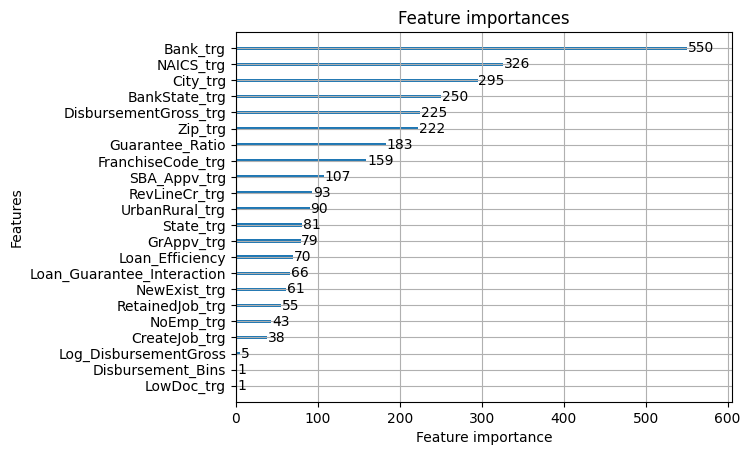

In [64]:
study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
func = lambda trial: objective(trial, X_train, y_train)
study.optimize(func, n_trials=200)

print('Best hyperparameters:', study.best_params)
print('Best AUCPR:', study.best_value)
plt.figure(figsize=(12,6))
lgb.plot_importance(lgb_clf, max_num_features=30)
plt.title("Feature importances")
plt.show()


In [65]:
optuna.visualization.plot_optimization_history(study)

In [66]:
optuna.visualization.plot_slice(study)

In [67]:
optuna.visualization.plot_param_importances(study)

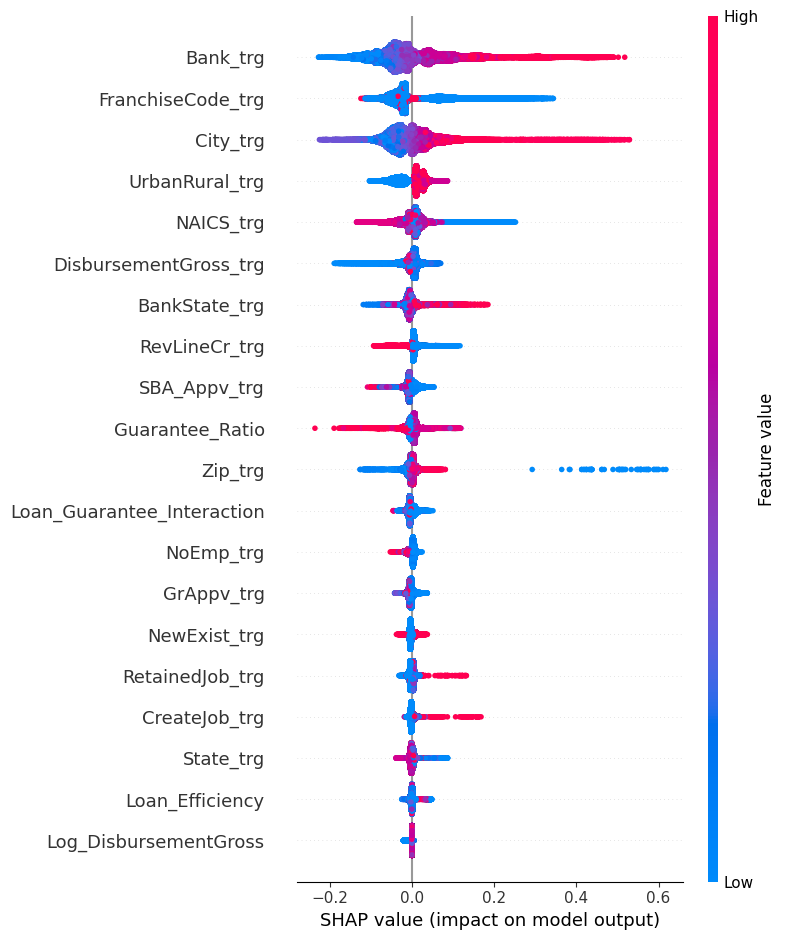

In [68]:
import shap
explainer = shap.TreeExplainer(lgb_clf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary plot (for all features)
shap.summary_plot(shap_values, X_test) 
plt.show()

In [69]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = study.best_params

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [70]:
best_params


{'learning_rate': 0.20089132161072837,
 'num_leaves': 430,
 'max_depth': 16,
 'min_data_in_leaf': 1000,
 'lambda_l1': 3.9913687299409246,
 'lambda_l2': 3.098685163406064,
 'bagging_fraction': 1.0,
 'bagging_freq': 5,
 'feature_fraction': 0.9,
 'is_unbalance': False}

In [71]:
print(f"\tBest value (AUC): {study.best_value:.5f}")
print(f"\tBest params:")

for key, value in study.best_params.items():
    print(f"\t\t{key}: {value}")

print("Best model best_iteration:", study_model_iteractions[study.best_trial.number])

	Best value (AUC): 0.85940
	Best params:
		learning_rate: 0.20089132161072837
		num_leaves: 430
		max_depth: 16
		min_data_in_leaf: 1000
		lambda_l1: 3.9913687299409246
		lambda_l2: 3.098685163406064
		bagging_fraction: 1.0
		bagging_freq: 5
		feature_fraction: 0.9
		is_unbalance: False
Best model best_iteration: 130.8


In [72]:
best_params = {"verbose": -1,
                "objective":"binary",
                "metric":"auc"
            }
for key,val in study.best_params.items():
    best_params[key] = val

best_params["num_iterations"] = int(study_model_iteractions[study.best_trial.number])
print(best_params)

{'verbose': -1, 'objective': 'binary', 'metric': 'auc', 'learning_rate': 0.20089132161072837, 'num_leaves': 430, 'max_depth': 16, 'min_data_in_leaf': 1000, 'lambda_l1': 3.9913687299409246, 'lambda_l2': 3.098685163406064, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False, 'num_iterations': 130}


# Training the model with parameters found using Optuna

In [104]:
print("AUC score on Test dataset:", roc_auc_score(y_test, lgb_clf.predict(X_test)))
print("AUC score on Train dataset:", roc_auc_score(y_train, lgb_clf.predict(X_train)))

ValueError: train and valid dataset categorical_feature do not match.

In [78]:
from sklearn.metrics import f1_score

# Assuming best_lgb is the trained LightGBM model and X_test, y_test are defined

# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = lgb_clf.predict(X_test)

# Set a range of thresholds to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

best_f1 = 0
best_threshold = 0

# Find the threshold that maximizes the F1 score
for threshold in thresholds:
    y_pred = (y_pred_proba > threshold).astype(int)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold

print("Best F1 score:", best_f1)
print("Best threshold:", best_threshold)

Best F1 score: 0.7076118078912634
Best threshold: 0.3


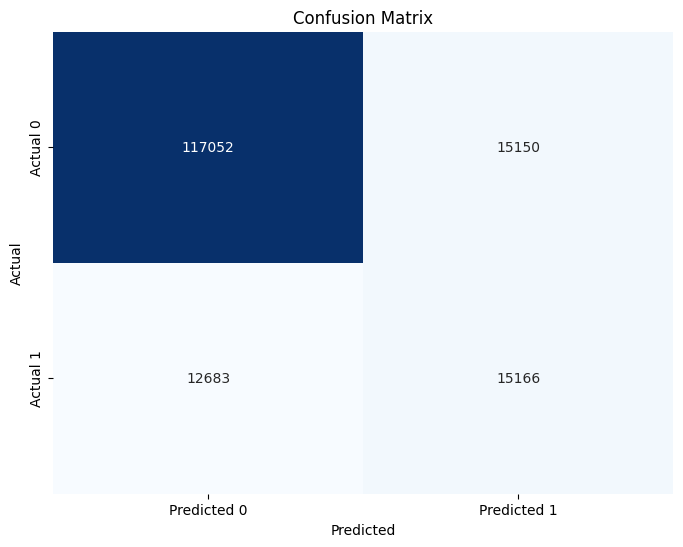

In [79]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Get the predicted probabilities for the positive class (class 1) from the test set
y_pred_proba = lgb_clf.predict(X_test)

# Use the threshold obtained earlier to predict binary labels
threshold = best_threshold
y_pred = (y_pred_proba > threshold).astype(int)

# Construct the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [80]:
import pickle

# Assuming you have a variable named 'best_params' containing the best hyperparameters
best_params = best_params

with open('best_params.pkl', 'wb') as f:
    pickle.dump(best_params, f)

In [90]:
from sklearn.metrics import f1_score
def calculate_optimal_threshold(classifier, X, y):
    y_prob = classifier.predict_proba(X)[:, 1]
    thresholds = np.linspace(0, 1, 100)
    f1_scores = []
    
    for threshold in thresholds:
        y_pred = (y_prob > threshold).astype(int)
        score = f1_score(y, y_pred, average='macro')
        f1_scores.append(score)
    
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    return optimal_threshold

In [93]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
import optuna
from sklearn.model_selection import StratifiedKFold
from optuna.integration import LightGBMPruningCallback
import warnings
import pickle
warnings.filterwarnings("ignore", category=UserWarning)

def train_model(data):

    data.drop(columns="index",inplace=True)
    for i in data['RevLineCr']:
        if i not in ['Y','N']:
            data['RevLineCr'].replace(i,'N',inplace=True)
    for i in data['LowDoc']:
        if i not in ['Y','N']:
            data['LowDoc'].replace(i,'N',inplace=True)
    for i in data['NewExist']:
        if i not in [1,2]:
            data['NewExist'].replace(i,None,inplace=True)

    cat_cols=['City', 'State', 'Bank', 'BankState', 'RevLineCr', 'LowDoc','NewExist']
    for column in cat_cols:
        data[column]=data[column].fillna(data[column].mode()[0])

    for column in cat_cols:
        data[column]=data[column].fillna(data[column].mode()[0])
    encoder = ce.TargetEncoder(cols=cat_cols)
    encoder.fit(data, data['MIS_Status'])
    data_encoded = encoder.transform(data)
    data_encoded = data_encoded.add_suffix('_trg')
    data_encoded = pd.concat([data_encoded, data], axis=1)
    for column in cat_cols:
        data_encoded[column + "_trg"].fillna(data_encoded[column + "_trg"].mean(), inplace=True)
    data_encoded.drop(columns=cat_cols, inplace=True)
    data_encoded.drop(columns='MIS_Status_trg', inplace=True)


    #Feature Engineering
    # Adding Features
    import numpy as np
    # Apply the log transformation to the specific feature in your training data
    #small_constant = 1e-10  # You can adjust this constant as needed
    # df['LogColumn'] = np.log(df['OriginalColumn'] + small_constant)
    data_encoded['Log_DisbursementGross'] = np.log1p(data_encoded['DisbursementGross'])
    data_encoded['Log_GrAppv'] = np.log1p(data_encoded['GrAppv'])
    data_encoded['Log_SBA_Appv'] = np.log1p(data_encoded['SBA_Appv'])
    data_encoded['Log_BalanceGross'] = np.log1p(data_encoded['BalanceGross'])
    data_encoded['TotalJobs'] = data_encoded['CreateJob'] + data_encoded['RetainedJob']
    #train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
    # Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
    data_encoded['IncomeToLoanRatio'] = data_encoded['DisbursementGross'] / data_encoded['SBA_Appv']
    # Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
    data_encoded['EmployeesToLoanRatio'] = data_encoded['NoEmp'] / data_encoded['SBA_Appv']
    # Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
    #train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
    # Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
    data_encoded['JobPerLoan'] = data_encoded['TotalJobs'] / data_encoded['SBA_Appv'] 
    # Calculate SBA's Gaurenteed Portion of Approved Loan
    data_encoded['Gauren_SBA_Appv'] = data_encoded['GrAppv'] / data_encoded['SBA_Appv']
    # Filter the DataFrame to include only the relevant rows
    default_group = data_encoded[data_encoded['MIS_Status'].isin([0, 1])]
    # Calculate the total number of loans in the filtered group
    total_loans = len(default_group)
    # Calculate the number of defaults (CHGOFF) in the filtered group
    default_loans = len(default_group[default_group['MIS_Status'] == 1])
    # Calculate the default rate as a percentage
    default_rate = (default_loans / total_loans) * 100
    # Create a new feature 'DefaultRate' with the calculated default rate
    data_encoded['DefaultRate'] = default_rate

    numerical_columns = [ 'NoEmp', 'CreateJob', 'RetainedJob', 'GrAppv', 'SBA_Appv', 'DisbursementGross', 'BalanceGross', 'Log_DisbursementGross', 'Log_NoEmp', 'Log_GrAppv', 'Log_SBA_Appv', 'Log_BalanceGross', 'Loan_Efficiency', 'Guarantee_Ratio', 'Loan_Guarantee_Interaction', 'Disbursement_Squared']
    scaler = StandardScaler()
    data_encoded[numerical_columns] = scaler.fit_transform(data_encoded[numerical_columns])
    for col in data_encoded.columns:
        print(col,":",data_encoded[col].dtype)

    X_train = data_encoded.copy()
    y_train = X_train['MIS_Status']
    X_train.drop(columns=['MIS_Status'], inplace=True)    
    study_model_iteractions = {}
    def objective(trial, X, y):
        param_grid = {
            "num_iterations": 10000,
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, step=0.05),
            "num_leaves": trial.suggest_int("num_leaves", 50, 150, step=5),
            "max_depth": trial.suggest_int("max_depth", 5, 20, step=2),
            "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 100, 1000, step=100),
            'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
            'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
            "bagging_fraction": trial.suggest_float("bagging_fraction", 0.8, 1.0, step=0.1),
            "bagging_freq": trial.suggest_categorical("bagging_freq", [5]),
            "feature_fraction": trial.suggest_float("feature_fraction", 0.8, 1.0, step=0.1),
            "is_unbalance": trial.suggest_categorical("is_unbalance", [True, False]),
            "objective": "binary",
            "metric": "auc",
            "verbose": -1
        }

        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1121218)

        cv_scores = np.empty(5)
        cv_iteractions = np.empty(5)
        for idx, (train_idx, test_idx) in enumerate(cv.split(X, y)):
            X_train, X_valid = X.iloc[train_idx], X.iloc[test_idx]
            y_train, y_valid = y.iloc[train_idx], y.iloc[test_idx]

            train_data = lgb.Dataset(data=X_train, label=y_train, params={"verbose":-1})
            valid_data = lgb.Dataset(data=X_valid, label=y_valid, params={"verbose":-1})
            lgb_clf = lgb.train(params=param_grid,
                                train_set=train_data,
                                valid_sets=[valid_data],
                                #categorical_feature=categorical_columns,
                                callbacks=[LightGBMPruningCallback(trial, "auc"),
                                            lgb.early_stopping(stopping_rounds=5)]  
                                )
            preds = lgb_clf.predict(X_valid)
            cv_scores[idx] = roc_auc_score(y_valid, preds)
            cv_iteractions[idx] = lgb_clf.best_iteration
        
        study_model_iteractions[trial.number] = np.mean(cv_iteractions)

        return np.mean(cv_scores)

    study = optuna.create_study(direction="maximize", study_name="LGBM Classifier")
    func = lambda trial: objective(trial, X_train, y_train)
    study.optimize(func, n_trials=200)
    best_params = study.best_params
    print("Best Parameters:", best_params)

    best_params = study.best_params
    print("Best Parameters:", best_params)

    # Create and train the classifier with the best parameters
    best_classifier = lgb.LGBMClassifier(**best_params)
    best_classifier.fit(X_train, y_train)

    # Now pass this classifier to your function
    optimal_threshold = calculate_optimal_threshold(best_classifier, X_train, y_train)
    print("Optimal Threshold:", optimal_threshold)
    artifacts_dict ={
        "best_classifier":best_classifier,
        "encoder":encoder,
        "scaler":scaler,
        "optimal_threshold":optimal_threshold,
        "numerical_columns":numerical_columns,
        "cat_cols":cat_cols,
        "columns_to_score":X_train.columns
    }

    artifacts_dict_file = open("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/N/Artifacts/artifacts_dict_file.pkl", "wb")
    #artifacts_dict_file = open("D:/Work/rtifacts/artifacts_dict_file.pkl", "wb")
    pickle.dump(artifacts_dict, artifacts_dict_file)
    artifacts_dict_file.close()
    
    return best_classifier

In [94]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/N/SBA_loans_project_2.csv')

X_train, X_test = train_test_split(df[:100], test_size=0.2, random_state=42)
train_model(X_train)

[I 2023-12-10 13:35:24,979] A new study created in memory with name: LGBM Classifier
[I 2023-12-10 13:35:25,096] Trial 0 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 110, 'max_depth': 13, 'min_data_in_leaf': 900, 'lambda_l1': 0.003567423487275583, 'lambda_l2': 0.2347437775305511, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


City_trg : float64
State_trg : float64
Zip_trg : int64
Bank_trg : float64
BankState_trg : float64
NAICS_trg : int64
NoEmp_trg : int64
NewExist_trg : float64
CreateJob_trg : int64
RetainedJob_trg : int64
FranchiseCode_trg : int64
UrbanRural_trg : int64
RevLineCr_trg : float64
LowDoc_trg : float64
DisbursementGross_trg : float64
BalanceGross_trg : float64
GrAppv_trg : float64
SBA_Appv_trg : float64
Zip : int64
NAICS : int64
NoEmp : float64
CreateJob : float64
RetainedJob : float64
FranchiseCode : int64
UrbanRural : int64
DisbursementGross : float64
BalanceGross : float64
GrAppv : float64
SBA_Appv : float64
MIS_Status : int64
Log_DisbursementGross : float64
Log_NoEmp : float64
Log_GrAppv : float64
Log_SBA_Appv : float64
Log_BalanceGross : float64
Disbursement_Bins : category
Loan_Efficiency : float64
Guarantee_Ratio : float64
Loan_Guarantee_Interaction : float64
Disbursement_Squared : float64
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1

[I 2023-12-10 13:35:25,225] Trial 1 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 105, 'max_depth': 11, 'min_data_in_leaf': 600, 'lambda_l1': 3.0925639456127893e-05, 'lambda_l2': 3.475790993546271e-06, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.
[I 2023-12-10 13:35:25,344] Trial 2 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 105, 'max_depth': 9, 'min_data_in_leaf': 800, 'lambda_l1': 5.4389846924331754e-08, 'lambda_l2': 0.0005739036891209343, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:25,457] Trial 3 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 85, 'max_depth': 11, 'min_data_in_leaf': 300, 'lambda_l1': 0.47425511875059884, 'lambda_l2': 1.9736652552845269, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rou

[I 2023-12-10 13:35:25,571] Trial 4 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 75, 'max_depth': 9, 'min_data_in_leaf': 200, 'lambda_l1': 3.6744195104521976e-06, 'lambda_l2': 1.7588150625646814e-08, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.
[I 2023-12-10 13:35:25,724] Trial 5 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 50, 'max_depth': 13, 'min_data_in_leaf': 100, 'lambda_l1': 0.4098077012867809, 'lambda_l2': 0.0031294060378878976, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:25,857] Trial 6 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 100, 'max_depth': 11, 'min_data_in_leaf': 1000, 'lambda_l1': 0.2333752998348449, 'lambda_l2': 0.0003567415147576174, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:25,997] Trial 7 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 125, 'max_depth': 11, 'min_data_in_leaf': 900, 'lambda_l1': 0.03320215018747851, 'lambda_l2': 0.0016076675855345266, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.
[I 2023-12-10 13:35:26,130] Trial 8 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 135, 'max_depth': 7, 'min_data_in_leaf': 500, 'lambda_l1': 7.681922112429371e-08, 'lambda_l2': 2.558058350525107e-05, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:26,268] Trial 9 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 115, 'max_depth': 15, 'min_data_in_leaf': 300, 'lambda_l1': 2.6820037499585902e-05, 'lambda_l2': 0.005276379575006172, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:35:26,476] Trial 10 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 700, 'lambda_l1': 0.007194748877863342, 'lambda_l2': 7.296286408338801, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:26,677] Trial 11 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 90, 'max_depth': 15, 'min_data_in_leaf': 600, 'lambda_l1': 0.0004950427171534575, 'lambda_l2': 1.2460187151704195e-06, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:26,882] Trial 12 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 70, 'max_depth': 5, 'min_data_in_leaf': 500, 'lambda_l1': 0.0008241956545610028, 'lambda_l2': 0.1558102644822673, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:27,096] Trial 13 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 115, 'max_depth': 17, 'min_data_in_leaf': 1000, 'lambda_l1': 5.087297937563866, 'lambda_l2': 2.300722760120373e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:27,300] Trial 14 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 135, 'max_depth': 13, 'min_data_in_leaf': 700, 'lambda_l1': 2.2553286852912523e-05, 'lambda_l2': 0.0730996480621641, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:27,499] Trial 15 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 100, 'max_depth': 15, 'min_data_in_leaf': 800, 'lambda_l1': 0.004155670880000069, 'lambda_l2': 2.5545620528001653e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:27,704] Trial 16 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 115, 'max_depth': 9, 'min_data_in_leaf': 400, 'lambda_l1': 0.00013061095008121574, 'lambda_l2': 0.05310833740277661, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.
[I 2023-12-10 13:35:27,928] Trial 17 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 85, 'max_depth': 19, 'min_data_in_leaf': 600, 'lambda_l1': 1.770226859189646e-06, 'lambda_l2': 0.7522273852155261, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:28,131] Trial 18 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 60, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 0.002235068896560785, 'lambda_l2': 0.01603265510805723, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:28,334] Trial 19 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 130, 'max_depth': 7, 'min_data_in_leaf': 900, 'lambda_l1': 0.00016677948194981392, 'lambda_l2': 0.2343692991585647, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:35:28,547] Trial 20 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 145, 'max_depth': 15, 'min_data_in_leaf': 700, 'lambda_l1': 0.01888191500098969, 'lambda_l2': 9.258141638581984, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:28,753] Trial 21 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 105, 'max_depth': 9, 'min_data_in_leaf': 800, 'lambda_l1': 2.0747628657151956e-08, 'lambda_l2': 0.0006340050080880939, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:28,969] Trial 22 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 105, 'max_depth': 7, 'min_data_in_leaf': 900, 'lambda_l1': 3.491414956185829e-07, 'lambda_l2': 0.013466633354476055, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:29,183] Trial 23 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 95, 'max_depth': 11, 'min_data_in_leaf': 700, 'lambda_l1': 1.4387293814129075e-08, 'lambda_l2': 9.882767261962323e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:29,394] Trial 24 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 120, 'max_depth': 9, 'min_data_in_leaf': 800, 'lambda_l1': 8.301530087145666e-07, 'lambda_l2': 0.0015543117915188024, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:29,604] Trial 25 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 110, 'max_depth': 5, 'min_data_in_leaf': 1000, 'lambda_l1': 1.673005787563147e-07, 'lambda_l2': 0.7350597437485147, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:29,827] Trial 26 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 80, 'max_depth': 13, 'min_data_in_leaf': 600, 'lambda_l1': 5.897650626625208e-06, 'lambda_l2': 0.015500413119532578, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:30,060] Trial 27 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 95, 'max_depth': 17, 'min_data_in_leaf': 900, 'lambda_l1': 5.2868477044722e-05, 'lambda_l2': 0.000106833142961557, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:30,270] Trial 28 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 105, 'max_depth': 11, 'min_data_in_leaf': 500, 'lambda_l1': 5.223118516737357e-06, 'lambda_l2': 5.16047733692106e-06, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:30,498] Trial 29 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 125, 'max_depth': 11, 'min_data_in_leaf': 400, 'lambda_l1': 9.39008231427282e-07, 'lambda_l2': 1.6006142643655572, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:30,698] Trial 30 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 90, 'max_depth': 9, 'min_data_in_leaf': 800, 'lambda_l1': 0.0006814711112494997, 'lambda_l2': 0.000810285559305562, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:35:30,909] Trial 31 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 75, 'max_depth': 11, 'min_data_in_leaf': 200, 'lambda_l1': 6.509040298282959e-08, 'lambda_l2': 2.0652068400031416, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:31,116] Trial 32 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 70, 'max_depth': 13, 'min_data_in_leaf': 100, 'lambda_l1': 0.062797125802049, 'lambda_l2': 1.3423549443565613e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:31,324] Trial 33 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 85, 'max_depth': 7, 'min_data_in_leaf': 300, 'lambda_l1': 0.17910616891951214, 'lambda_l2': 2.6362832708086717e-08, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:31,536] Trial 34 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 9, 'min_data_in_leaf': 400, 'lambda_l1': 1.269378533229542, 'lambda_l2': 0.004558508148041455, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:31,748] Trial 35 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 95, 'max_depth': 13, 'min_data_in_leaf': 200, 'lambda_l1': 0.009118576297998605, 'lambda_l2': 0.2524693866153694, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:31,958] Trial 36 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 60, 'max_depth': 11, 'min_data_in_leaf': 300, 'lambda_l1': 0.06853988134663766, 'lambda_l2': 0.00024223500622125337, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:32,172] Trial 37 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 120, 'max_depth': 9, 'min_data_in_leaf': 900, 'lambda_l1': 0.002177962093877097, 'lambda_l2': 0.002650784201933259, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:32,384] Trial 38 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 110, 'max_depth': 11, 'min_data_in_leaf': 1000, 'lambda_l1': 2.1215879075368813e-05, 'lambda_l2': 0.03526532858823164, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:32,590] Trial 39 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 85, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 0.00018615467419424831, 'lambda_l2': 4.20132514951739, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:35:32,800] Trial 40 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 100, 'max_depth': 13, 'min_data_in_leaf': 600, 'lambda_l1': 0.5542958791785171, 'lambda_l2': 0.2987443819144282, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:33,019] Trial 41 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 75, 'max_depth': 11, 'min_data_in_leaf': 200, 'lambda_l1': 5.599776808741935e-06, 'lambda_l2': 3.874650280251776e-07, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:33,239] Trial 42 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 60, 'max_depth': 9, 'min_data_in_leaf': 300, 'lambda_l1': 4.741574347186456e-05, 'lambda_l2': 8.359322906710465e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:33,453] Trial 43 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 100, 'max_depth': 11, 'min_data_in_leaf': 200, 'lambda_l1': 7.6628483252709385, 'lambda_l2': 3.8901829258283286e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:33,670] Trial 44 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 90, 'max_depth': 9, 'min_data_in_leaf': 400, 'lambda_l1': 0.020977659040795665, 'lambda_l2': 1.9597954380175955e-08, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:33,914] Trial 45 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 80, 'max_depth': 11, 'min_data_in_leaf': 500, 'lambda_l1': 0.0005117782317721347, 'lambda_l2': 2.0533590246984062e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:34,146] Trial 46 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 50, 'max_depth': 15, 'min_data_in_leaf': 700, 'lambda_l1': 0.0010580988375892245, 'lambda_l2': 5.35715006009444e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:34,375] Trial 47 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 70, 'max_depth': 13, 'min_data_in_leaf': 100, 'lambda_l1': 0.00024048430334440917, 'lambda_l2': 2.6996750094420225e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:34,602] Trial 48 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 120, 'max_depth': 9, 'min_data_in_leaf': 1000, 'lambda_l1': 2.2636385251332634, 'lambda_l2': 7.793980575361285e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:34,837] Trial 49 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 105, 'max_depth': 7, 'min_data_in_leaf': 300, 'lambda_l1': 0.007930811435398723, 'lambda_l2': 0.09276297238284338, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:35,068] Trial 50 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 115, 'max_depth': 13, 'min_data_in_leaf': 600, 'lambda_l1': 9.50785663355875e-05, 'lambda_l2': 1.0694691644872366e-08, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:35,294] Trial 51 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 50, 'max_depth': 15, 'min_data_in_leaf': 100, 'lambda_l1': 0.7396992505511842, 'lambda_l2': 0.0003139747472797364, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:35,524] Trial 52 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 65, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 0.12299982363359722, 'lambda_l2': 0.006125706384087318, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:35,748] Trial 53 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 55, 'max_depth': 13, 'min_data_in_leaf': 100, 'lambda_l1': 0.36757741973425084, 'lambda_l2': 5.735150472193969e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:36,007] Trial 54 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 90, 'max_depth': 11, 'min_data_in_leaf': 800, 'lambda_l1': 1.9185243550185493, 'lambda_l2': 0.0006952974536223889, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:36,239] Trial 55 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 15, 'min_data_in_leaf': 700, 'lambda_l1': 0.2613807630522729, 'lambda_l2': 0.0001760835668466753, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:36,471] Trial 56 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 100, 'max_depth': 9, 'min_data_in_leaf': 900, 'lambda_l1': 1.3104566796146564e-05, 'lambda_l2': 0.0012663084761984922, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:36,697] Trial 57 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 130, 'max_depth': 13, 'min_data_in_leaf': 500, 'lambda_l1': 0.04080739391751372, 'lambda_l2': 0.050818510680612626, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:36,914] Trial 58 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 95, 'max_depth': 7, 'min_data_in_leaf': 200, 'lambda_l1': 2.1630759275824996e-06, 'lambda_l2': 4.767901404387205e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:37,165] Trial 59 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 80, 'max_depth': 11, 'min_data_in_leaf': 900, 'lambda_l1': 6.5965618201513e-08, 'lambda_l2': 0.00037993604493044537, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:37,404] Trial 60 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 105, 'max_depth': 5, 'min_data_in_leaf': 400, 'lambda_l1': 3.717853354533276e-07, 'lambda_l2': 0.0026419293882327397, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:37,646] Trial 61 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 115, 'max_depth': 11, 'min_data_in_leaf': 1000, 'lambda_l1': 4.698648761775, 'lambda_l2': 0.0004613644371458605, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:37,874] Trial 62 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 65, 'max_depth': 9, 'min_data_in_leaf': 1000, 'lambda_l1': 0.10361522070666956, 'lambda_l2': 0.001090384900032861, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:38,105] Trial 63 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 11, 'min_data_in_leaf': 900, 'lambda_l1': 0.22670042054333756, 'lambda_l2': 0.00018525530715672806, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:38,333] Trial 64 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 85, 'max_depth': 13, 'min_data_in_leaf': 700, 'lambda_l1': 0.027255706340114105, 'lambda_l2': 0.6544621701311515, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:38,544] Trial 65 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 100, 'max_depth': 9, 'min_data_in_leaf': 800, 'lambda_l1': 0.5226226351730614, 'lambda_l2': 1.7339986994456906e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:38,783] Trial 66 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 95, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 0.014882693413532605, 'lambda_l2': 0.00014492576000024065, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:39,006] Trial 67 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 75, 'max_depth': 11, 'min_data_in_leaf': 900, 'lambda_l1': 0.0003591548426226163, 'lambda_l2': 5.564839758674495e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:39,228] Trial 68 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 140, 'max_depth': 15, 'min_data_in_leaf': 1000, 'lambda_l1': 1.791746535799989e-08, 'lambda_l2': 0.007365263682612442, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:39,459] Trial 69 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 105, 'max_depth': 9, 'min_data_in_leaf': 300, 'lambda_l1': 0.00010154655281486354, 'lambda_l2': 0.0006346854297581187, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:39,696] Trial 70 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 115, 'max_depth': 11, 'min_data_in_leaf': 200, 'lambda_l1': 0.0038511368660996796, 'lambda_l2': 0.01574378390489584, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:39,988] Trial 71 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 125, 'max_depth': 11, 'min_data_in_leaf': 900, 'lambda_l1': 0.07461802041208204, 'lambda_l2': 0.0016672371961889347, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:40,231] Trial 72 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 150, 'max_depth': 13, 'min_data_in_leaf': 1000, 'lambda_l1': 0.035524420442934336, 'lambda_l2': 0.0025228304481138804, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:40,472] Trial 73 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 125, 'max_depth': 11, 'min_data_in_leaf': 100, 'lambda_l1': 0.2316707201160792, 'lambda_l2': 0.03242082831070921, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:40,719] Trial 74 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 135, 'max_depth': 9, 'min_data_in_leaf': 800, 'lambda_l1': 4.299987097290169e-08, 'lambda_l2': 6.5183346477952515, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:40,958] Trial 75 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 120, 'max_depth': 13, 'min_data_in_leaf': 900, 'lambda_l1': 0.048255736182900126, 'lambda_l2': 0.00048514859004179675, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:41,212] Trial 76 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 90, 'max_depth': 11, 'min_data_in_leaf': 1000, 'lambda_l1': 0.1365549676838426, 'lambda_l2': 9.16619866219306e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:41,429] Trial 77 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 55, 'max_depth': 13, 'min_data_in_leaf': 900, 'lambda_l1': 1.042727615961511, 'lambda_l2': 0.0002795220197159831, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:41,694] Trial 78 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 115, 'max_depth': 9, 'min_data_in_leaf': 700, 'lambda_l1': 1.1367459579290167e-07, 'lambda_l2': 0.008547273240264441, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:41,912] Trial 79 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 110, 'max_depth': 19, 'min_data_in_leaf': 500, 'lambda_l1': 1.8474308761685084e-07, 'lambda_l2': 0.0010004271061930304, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:42,147] Trial 80 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 95, 'max_depth': 11, 'min_data_in_leaf': 200, 'lambda_l1': 0.424250966290521, 'lambda_l2': 0.0035621877054811766, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:42,388] Trial 81 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 130, 'max_depth': 7, 'min_data_in_leaf': 600, 'lambda_l1': 2.748772860673897e-08, 'lambda_l2': 4.024881151588457e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:42,613] Trial 82 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 140, 'max_depth': 7, 'min_data_in_leaf': 400, 'lambda_l1': 1.1127319700612863e-08, 'lambda_l2': 1.7585053602799083e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:42,834] Trial 83 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 135, 'max_depth': 5, 'min_data_in_leaf': 300, 'lambda_l1': 8.642244325400186e-06, 'lambda_l2': 1.3284050189668519e-05, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds


[I 2023-12-10 13:35:43,062] Trial 84 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 140, 'max_depth': 7, 'min_data_in_leaf': 100, 'lambda_l1': 2.8071520403017306e-06, 'lambda_l2': 2.7546641569650528e-05, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:43,304] Trial 85 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 105, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 9.475504259906891e-07, 'lambda_l2': 0.14098093976184797, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:43,579] Trial 86 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 130, 'max_depth': 9, 'min_data_in_leaf': 600, 'lambda_l1': 2.2425809268869236e-05, 'lambda_l2': 0.00011208661250519128, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:43,812] Trial 87 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 100, 'max_depth': 5, 'min_data_in_leaf': 200, 'lambda_l1': 5.0717689519912666e-05, 'lambda_l2': 6.192549566194103e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:44,038] Trial 88 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 65, 'max_depth': 11, 'min_data_in_leaf': 500, 'lambda_l1': 0.014693315881772381, 'lambda_l2': 9.096064470760777e-08, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:44,259] Trial 89 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 80, 'max_depth': 15, 'min_data_in_leaf': 300, 'lambda_l1': 4.36158839540123e-07, 'lambda_l2': 0.0016199908271176257, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:44,484] Trial 90 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 85, 'max_depth': 9, 'min_data_in_leaf': 1000, 'lambda_l1': 0.15443738902114612, 'lambda_l2': 8.468703859374643e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:44,719] Trial 91 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 120, 'max_depth': 15, 'min_data_in_leaf': 400, 'lambda_l1': 3.492214238116625e-05, 'lambda_l2': 0.004134686587372591, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:44,961] Trial 92 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 110, 'max_depth': 17, 'min_data_in_leaf': 300, 'lambda_l1': 3.042977767538195e-06, 'lambda_l2': 0.0007583605154122946, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:45,231] Trial 93 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 115, 'max_depth': 11, 'min_data_in_leaf': 200, 'lambda_l1': 8.233740960363437e-05, 'lambda_l2': 0.000281414554717683, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:45,461] Trial 94 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 105, 'max_depth': 17, 'min_data_in_leaf': 100, 'lambda_l1': 0.00023493623791167123, 'lambda_l2': 0.0018681444962080369, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:45,694] Trial 95 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 120, 'max_depth': 13, 'min_data_in_leaf': 400, 'lambda_l1': 1.4575471748159113e-05, 'lambda_l2': 0.0005753732658719266, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:45,946] Trial 96 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 100, 'max_depth': 15, 'min_data_in_leaf': 300, 'lambda_l1': 0.0016233958280848229, 'lambda_l2': 0.009381979653860803, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:46,174] Trial 97 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 11, 'min_data_in_leaf': 900, 'lambda_l1': 4.8956392322365435e-06, 'lambda_l2': 0.004926891437036109, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:46,424] Trial 98 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 70, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 0.2954404957913085, 'lambda_l2': 0.001051403349444519, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:46,660] Trial 99 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 125, 'max_depth': 9, 'min_data_in_leaf': 700, 'lambda_l1': 0.09397827216215093, 'lambda_l2': 0.022715091311792095, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:46,879] Trial 100 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 125, 'max_depth': 11, 'min_data_in_leaf': 200, 'lambda_l1': 0.004678161690050711, 'lambda_l2': 1.7552425456881102, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:47,144] Trial 101 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 600, 'lambda_l1': 0.00013337876968137514, 'lambda_l2': 2.613009714984121, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:47,393] Trial 102 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 145, 'max_depth': 17, 'min_data_in_leaf': 700, 'lambda_l1': 0.000965441215449598, 'lambda_l2': 3.6702258121147793, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:47,628] Trial 103 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 115, 'max_depth': 11, 'min_data_in_leaf': 800, 'lambda_l1': 0.06064010855823466, 'lambda_l2': 1.06823917315386, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:47,862] Trial 104 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 145, 'max_depth': 19, 'min_data_in_leaf': 700, 'lambda_l1': 1.2088992812066172e-06, 'lambda_l2': 0.5280487737363712, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:48,094] Trial 105 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 75, 'max_depth': 7, 'min_data_in_leaf': 600, 'lambda_l1': 0.00046305134292390436, 'lambda_l2': 0.0002139832513408895, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:48,328] Trial 106 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 105, 'max_depth': 11, 'min_data_in_leaf': 900, 'lambda_l1': 5.6283408069759e-07, 'lambda_l2': 9.660149345617057, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:48,570] Trial 107 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 135, 'max_depth': 13, 'min_data_in_leaf': 500, 'lambda_l1': 0.8484971157802772, 'lambda_l2': 0.00041410404875778144, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:48,823] Trial 108 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 55, 'max_depth': 17, 'min_data_in_leaf': 700, 'lambda_l1': 3.0473252329113554e-05, 'lambda_l2': 0.3842828973642254, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:49,077] Trial 109 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 90, 'max_depth': 9, 'min_data_in_leaf': 800, 'lambda_l1': 1.861078699568194e-07, 'lambda_l2': 5.8845135080680055, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:49,323] Trial 110 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 105, 'max_depth': 11, 'min_data_in_leaf': 900, 'lambda_l1': 0.03401607402532377, 'lambda_l2': 0.8409292833483206, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:49,573] Trial 111 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 100, 'max_depth': 15, 'min_data_in_leaf': 600, 'lambda_l1': 0.0006100714195627717, 'lambda_l2': 0.14787523967150126, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:49,805] Trial 112 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 85, 'max_depth': 15, 'min_data_in_leaf': 600, 'lambda_l1': 0.0002999561918233892, 'lambda_l2': 1.2517938431393065, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:50,039] Trial 113 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 95, 'max_depth': 13, 'min_data_in_leaf': 500, 'lambda_l1': 0.0035798270129075308, 'lambda_l2': 2.487428188869173, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:50,296] Trial 114 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 110, 'max_depth': 11, 'min_data_in_leaf': 700, 'lambda_l1': 0.008557339582889158, 'lambda_l2': 2.6823198708888454e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:50,577] Trial 115 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 95, 'max_depth': 13, 'min_data_in_leaf': 100, 'lambda_l1': 0.00017215768607799727, 'lambda_l2': 2.983917267466506e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:50,819] Trial 116 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 130, 'max_depth': 17, 'min_data_in_leaf': 800, 'lambda_l1': 0.0014772239965800114, 'lambda_l2': 1.1189173505137469e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:51,045] Trial 117 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 100, 'max_depth': 11, 'min_data_in_leaf': 600, 'lambda_l1': 0.5972701733479729, 'lambda_l2': 7.286561676249343e-06, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:51,278] Trial 118 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 90, 'max_depth': 7, 'min_data_in_leaf': 1000, 'lambda_l1': 0.024487620304826065, 'lambda_l2': 3.4520025924200714e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:51,526] Trial 119 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 150, 'max_depth': 19, 'min_data_in_leaf': 400, 'lambda_l1': 0.0007213338385852958, 'lambda_l2': 1.652185558450605e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:51,744] Trial 120 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 110, 'max_depth': 9, 'min_data_in_leaf': 700, 'lambda_l1': 0.1772431013043381, 'lambda_l2': 0.002945657428191554, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:51,989] Trial 121 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 80, 'max_depth': 5, 'min_data_in_leaf': 500, 'lambda_l1': 0.00040720451894198643, 'lambda_l2': 0.06055403978950747, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:52,240] Trial 122 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 70, 'max_depth': 5, 'min_data_in_leaf': 500, 'lambda_l1': 0.0019382210394341649, 'lambda_l2': 0.43634448867957104, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:52,488] Trial 123 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 75, 'max_depth': 7, 'min_data_in_leaf': 600, 'lambda_l1': 0.0009977582682814776, 'lambda_l2': 4.2282865773238446e-08, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:52,727] Trial 124 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 85, 'max_depth': 5, 'min_data_in_leaf': 200, 'lambda_l1': 6.433336385670041e-05, 'lambda_l2': 0.268286697951148, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:52,976] Trial 125 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 80, 'max_depth': 13, 'min_data_in_leaf': 500, 'lambda_l1': 0.002851531374436063, 'lambda_l2': 0.009863971768296603, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:53,235] Trial 126 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 65, 'max_depth': 7, 'min_data_in_leaf': 300, 'lambda_l1': 9.184096404995537e-06, 'lambda_l2': 1.0156455333078932e-08, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:53,488] Trial 127 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 50, 'max_depth': 11, 'min_data_in_leaf': 400, 'lambda_l1': 4.248942254337041e-08, 'lambda_l2': 0.0008502453318130263, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:53,742] Trial 128 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 60, 'max_depth': 15, 'min_data_in_leaf': 900, 'lambda_l1': 0.004866604987647822, 'lambda_l2': 0.0018760462810025092, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:53,988] Trial 129 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 70, 'max_depth': 9, 'min_data_in_leaf': 600, 'lambda_l1': 0.00022709627372383503, 'lambda_l2': 0.00605129722462992, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:54,247] Trial 130 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 115, 'max_depth': 11, 'min_data_in_leaf': 100, 'lambda_l1': 0.00011091739769027608, 'lambda_l2': 7.398860610407705e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:54,491] Trial 131 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 105, 'max_depth': 17, 'min_data_in_leaf': 1000, 'lambda_l1': 2.136703011998311, 'lambda_l2': 1.019308903683165e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:54,735] Trial 132 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 120, 'max_depth': 15, 'min_data_in_leaf': 1000, 'lambda_l1': 1.620981620099557, 'lambda_l2': 3.961831904444606e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:54,961] Trial 133 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 19, 'min_data_in_leaf': 1000, 'lambda_l1': 4.50940237207001, 'lambda_l2': 5.454208798438184e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:55,216] Trial 134 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 100, 'max_depth': 13, 'min_data_in_leaf': 1000, 'lambda_l1': 0.960197668134757, 'lambda_l2': 0.00016996234913717084, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:55,476] Trial 135 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 115, 'max_depth': 17, 'min_data_in_leaf': 900, 'lambda_l1': 0.3186990244589384, 'lambda_l2': 2.3344304798029387e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:55,733] Trial 136 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 75, 'max_depth': 19, 'min_data_in_leaf': 500, 'lambda_l1': 0.014545518010230076, 'lambda_l2': 0.00035454164859046106, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:55,983] Trial 137 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 140, 'max_depth': 15, 'min_data_in_leaf': 200, 'lambda_l1': 0.4634333331974738, 'lambda_l2': 8.361342323896684e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:56,218] Trial 138 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 145, 'max_depth': 17, 'min_data_in_leaf': 900, 'lambda_l1': 0.097673499109494, 'lambda_l2': 1.8353239099129136e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:56,460] Trial 139 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 120, 'max_depth': 11, 'min_data_in_leaf': 800, 'lambda_l1': 1.237785093316625, 'lambda_l2': 0.03560105975381707, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:56,694] Trial 140 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 105, 'max_depth': 13, 'min_data_in_leaf': 400, 'lambda_l1': 1.8895976956984272e-06, 'lambda_l2': 4.073472073671844e-06, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:56,927] Trial 141 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 130, 'max_depth': 13, 'min_data_in_leaf': 700, 'lambda_l1': 2.1346613193130666e-05, 'lambda_l2': 0.0013337224159843078, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:57,175] Trial 142 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 135, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 6.402449174344301e-05, 'lambda_l2': 0.2279750480695774, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:57,427] Trial 143 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 125, 'max_depth': 13, 'min_data_in_leaf': 300, 'lambda_l1': 3.9824212622407775e-05, 'lambda_l2': 1.1986001020653784e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:57,676] Trial 144 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 140, 'max_depth': 11, 'min_data_in_leaf': 700, 'lambda_l1': 0.6413957712625824, 'lambda_l2': 1.3263889208914284e-06, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:57,940] Trial 145 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 135, 'max_depth': 5, 'min_data_in_leaf': 500, 'lambda_l1': 1.579686377427859e-05, 'lambda_l2': 5.734435437205925e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:58,188] Trial 146 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 110, 'max_depth': 15, 'min_data_in_leaf': 600, 'lambda_l1': 0.0061262375082920114, 'lambda_l2': 0.09745179870713958, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:58,448] Trial 147 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 115, 'max_depth': 11, 'min_data_in_leaf': 600, 'lambda_l1': 0.00261087103306198, 'lambda_l2': 0.6940706625892173, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:58,723] Trial 148 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 90, 'max_depth': 7, 'min_data_in_leaf': 1000, 'lambda_l1': 0.011421866356223933, 'lambda_l2': 2.7214147423616367e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:58,973] Trial 149 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 105, 'max_depth': 9, 'min_data_in_leaf': 700, 'lambda_l1': 0.05326236158713816, 'lambda_l2': 3.5982803360550994e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:59,210] Trial 150 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 95, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 3.577620129390768e-06, 'lambda_l2': 1.5502815825202854e-08, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:59,461] Trial 151 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 100, 'max_depth': 15, 'min_data_in_leaf': 900, 'lambda_l1': 0.021255917422557342, 'lambda_l2': 8.949653359200894e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:59,721] Trial 152 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 100, 'max_depth': 15, 'min_data_in_leaf': 700, 'lambda_l1': 0.006564914084483395, 'lambda_l2': 0.00011956792816990804, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:35:59,977] Trial 153 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 105, 'max_depth': 15, 'min_data_in_leaf': 800, 'lambda_l1': 0.0014201872393672743, 'lambda_l2': 7.36903507087974e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:00,225] Trial 154 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 125, 'max_depth': 15, 'min_data_in_leaf': 100, 'lambda_l1': 0.183959483644373, 'lambda_l2': 1.5546332825560694e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:00,493] Trial 155 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 95, 'max_depth': 11, 'min_data_in_leaf': 900, 'lambda_l1': 6.021121742285633e-06, 'lambda_l2': 5.080256129169132e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:00,741] Trial 156 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 55, 'max_depth': 13, 'min_data_in_leaf': 1000, 'lambda_l1': 0.01014387699049795, 'lambda_l2': 0.0005345560056598502, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:00,996] Trial 157 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 105, 'max_depth': 17, 'min_data_in_leaf': 200, 'lambda_l1': 3.2089194600220904e-05, 'lambda_l2': 3.5748102624949603, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:01,230] Trial 158 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 120, 'max_depth': 11, 'min_data_in_leaf': 600, 'lambda_l1': 0.00016001875692923275, 'lambda_l2': 1.477938957498215, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:01,492] Trial 159 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 100, 'max_depth': 19, 'min_data_in_leaf': 800, 'lambda_l1': 0.002519992657488298, 'lambda_l2': 2.5503767143229268e-05, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:01,727] Trial 160 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 75, 'max_depth': 15, 'min_data_in_leaf': 500, 'lambda_l1': 1.3391589293712482e-06, 'lambda_l2': 0.013536293518876764, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:02,014] Trial 161 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 115, 'max_depth': 9, 'min_data_in_leaf': 300, 'lambda_l1': 0.00010001582978792469, 'lambda_l2': 0.024237912478513538, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:02,269] Trial 162 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 110, 'max_depth': 9, 'min_data_in_leaf': 400, 'lambda_l1': 0.0003557238614589968, 'lambda_l2': 0.08218414991794246, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:02,517] Trial 163 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 145, 'max_depth': 9, 'min_data_in_leaf': 400, 'lambda_l1': 0.0006411213188533359, 'lambda_l2': 0.15865517059537698, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:02,757] Trial 164 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 110, 'max_depth': 7, 'min_data_in_leaf': 500, 'lambda_l1': 5.5805640200375086e-05, 'lambda_l2': 0.052918582646405025, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:03,025] Trial 165 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 60, 'max_depth': 9, 'min_data_in_leaf': 300, 'lambda_l1': 1.0115469380487818e-05, 'lambda_l2': 1.1196140447914322e-06, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:03,276] Trial 166 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 85, 'max_depth': 11, 'min_data_in_leaf': 600, 'lambda_l1': 1.0543452518290615e-07, 'lambda_l2': 1.9224954576740897e-07, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:03,531] Trial 167 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 115, 'max_depth': 13, 'min_data_in_leaf': 500, 'lambda_l1': 2.7621893236098867e-07, 'lambda_l2': 5.484985041124345e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:03,793] Trial 168 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 11, 'min_data_in_leaf': 200, 'lambda_l1': 0.38400834346291396, 'lambda_l2': 2.2253658123391003e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:04,062] Trial 169 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 125, 'max_depth': 9, 'min_data_in_leaf': 400, 'lambda_l1': 0.0366475913056854, 'lambda_l2': 0.003924842778351945, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:04,313] Trial 170 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 80, 'max_depth': 5, 'min_data_in_leaf': 900, 'lambda_l1': 0.003741190399020021, 'lambda_l2': 0.00022883358968661755, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:04,592] Trial 171 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 90, 'max_depth': 19, 'min_data_in_leaf': 600, 'lambda_l1': 2.2884611114034268e-05, 'lambda_l2': 3.6898719705691635e-08, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:04,858] Trial 172 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 85, 'max_depth': 19, 'min_data_in_leaf': 600, 'lambda_l1': 7.148459627184845e-07, 'lambda_l2': 6.296026942977523e-08, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:05,129] Trial 173 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 90, 'max_depth': 19, 'min_data_in_leaf': 600, 'lambda_l1': 0.12840545251755828, 'lambda_l2': 4.4667323725925025e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:05,376] Trial 174 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 95, 'max_depth': 19, 'min_data_in_leaf': 700, 'lambda_l1': 4.797368378105874, 'lambda_l2': 0.43947515511452856, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:05,636] Trial 175 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 120, 'max_depth': 17, 'min_data_in_leaf': 1000, 'lambda_l1': 1.1704355352490194e-05, 'lambda_l2': 1.060517708566578, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:05,892] Trial 176 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 80, 'max_depth': 13, 'min_data_in_leaf': 600, 'lambda_l1': 0.0779193343203016, 'lambda_l2': 1.2951815004454522e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:06,159] Trial 177 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 100, 'max_depth': 7, 'min_data_in_leaf': 300, 'lambda_l1': 5.660622732343501e-06, 'lambda_l2': 6.987993876949653e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:06,405] Trial 178 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 85, 'max_depth': 11, 'min_data_in_leaf': 500, 'lambda_l1': 3.336696503155114e-08, 'lambda_l2': 0.002215270686099899, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:06,663] Trial 179 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 65, 'max_depth': 9, 'min_data_in_leaf': 800, 'lambda_l1': 2.3604523268422672e-08, 'lambda_l2': 0.21382053374764248, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:06,921] Trial 180 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 50, 'max_depth': 17, 'min_data_in_leaf': 700, 'lambda_l1': 0.23231812474479743, 'lambda_l2': 0.0008746038181333597, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 1.0, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:07,171] Trial 181 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 50, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 0.0010271720564286402, 'lambda_l2': 1.4131896833061964e-05, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:07,427] Trial 182 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 60, 'max_depth': 13, 'min_data_in_leaf': 800, 'lambda_l1': 1.5410615003263953e-08, 'lambda_l2': 3.261751009048947e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:07,675] Trial 183 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 70, 'max_depth': 13, 'min_data_in_leaf': 900, 'lambda_l1': 6.830822807279393e-08, 'lambda_l2': 2.2593706869336138e-06, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:07,938] Trial 184 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 55, 'max_depth': 15, 'min_data_in_leaf': 800, 'lambda_l1': 1.684250586115292e-05, 'lambda_l2': 0.005397600406329358, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:08,200] Trial 185 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 115, 'max_depth': 13, 'min_data_in_leaf': 1000, 'lambda_l1': 0.0015167432855080181, 'lambda_l2': 8.008470921187291e-08, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:08,473] Trial 186 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 65, 'max_depth': 19, 'min_data_in_leaf': 700, 'lambda_l1': 0.006485177555003385, 'lambda_l2': 2.116298620290365e-08, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:08,739] Trial 187 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 130, 'max_depth': 11, 'min_data_in_leaf': 800, 'lambda_l1': 0.002320960063671422, 'lambda_l2': 6.044491402031037, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:09,022] Trial 188 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 105, 'max_depth': 15, 'min_data_in_leaf': 600, 'lambda_l1': 0.7089953890428757, 'lambda_l2': 2.320904548479245e-05, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:09,291] Trial 189 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 150, 'max_depth': 13, 'min_data_in_leaf': 300, 'lambda_l1': 3.147102461651476e-05, 'lambda_l2': 4.2118899268856055e-06, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:09,556] Trial 190 finished with value: 0.5 and parameters: {'learning_rate': 0.060000000000000005, 'num_leaves': 80, 'max_depth': 9, 'min_data_in_leaf': 900, 'lambda_l1': 2.3704030124314177e-06, 'lambda_l2': 1.647561910078639e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:09,820] Trial 191 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 135, 'max_depth': 7, 'min_data_in_leaf': 900, 'lambda_l1': 0.00024200478922270402, 'lambda_l2': 0.3252758633644203, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:10,076] Trial 192 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 130, 'max_depth': 5, 'min_data_in_leaf': 1000, 'lambda_l1': 7.943391682612784e-05, 'lambda_l2': 0.11924370438278646, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:10,342] Trial 193 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 135, 'max_depth': 7, 'min_data_in_leaf': 900, 'lambda_l1': 0.00013522150618687276, 'lambda_l2': 0.07798752821931262, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:10,617] Trial 194 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 140, 'max_depth': 11, 'min_data_in_leaf': 400, 'lambda_l1': 0.0004885017833492651, 'lambda_l2': 0.16272374371165163, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:10,878] Trial 195 finished with value: 0.5 and parameters: {'learning_rate': 0.16000000000000003, 'num_leaves': 130, 'max_depth': 11, 'min_data_in_leaf': 100, 'lambda_l1': 5.086660359130018e-05, 'lambda_l2': 0.6043660579520739, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:11,151] Trial 196 finished with value: 0.5 and parameters: {'learning_rate': 0.11, 'num_leaves': 60, 'max_depth': 9, 'min_data_in_leaf': 500, 'lambda_l1': 1.6125622659971122, 'lambda_l2': 0.04523380757948538, 'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:11,420] Trial 197 finished with value: 0.5 and parameters: {'learning_rate': 0.01, 'num_leaves': 135, 'max_depth': 5, 'min_data_in_leaf': 900, 'lambda_l1': 3.003817314269428, 'lambda_l2': 2.3011959902565287, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': True}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:11,708] Trial 198 finished with value: 0.5 and parameters: {'learning_rate': 0.26, 'num_leaves': 110, 'max_depth': 17, 'min_data_in_leaf': 700, 'lambda_l1': 7.4240310593890106e-06, 'lambda_l2': 2.9484974905039837e-07, 'bagging_fraction': 1.0, 'bagging_freq': 5, 'feature_fraction': 0.8, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5


[I 2023-12-10 13:36:11,959] Trial 199 finished with value: 0.5 and parameters: {'learning_rate': 0.21000000000000002, 'num_leaves': 105, 'max_depth': 13, 'min_data_in_leaf': 200, 'lambda_l1': 0.000805126058246671, 'lambda_l2': 0.0003464324451063525, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}. Best is trial 0 with value: 0.5.


Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Training until validation scores don't improve for 5 rounds
Early stopping, best iteration is:
[1]	valid_0's auc: 0.5
Best Parameters: {'learning_rate': 0.01, 'num_leaves': 110, 'max_depth': 13, 'min_data_in_leaf': 900, 'lambda_l1': 0.003567423487275583, 'lambda_l2': 0.2347437775305511, 'bagging_fraction': 0.9, 'bagging_freq': 5, 'feature_fraction': 0.9, 'is_unbalance': False}
Best Parameters: {'learning_rate': 0.01, 'num_leaves': 110, 'max_depth': 13, 'min_data_in_leaf': 900, 'lambda_l1': 0.003567423487275583, 'lambda_l2'

LGBMClassifier(bagging_fraction=0.9, bagging_freq=5, feature_fraction=0.9,
               is_unbalance=False, lambda_l1=0.003567423487275583,
               lambda_l2=0.2347437775305511, learning_rate=0.01, max_depth=13,
               min_data_in_leaf=900, num_leaves=110)

In [101]:
import shap
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
%matplotlib inline
def examine_indiv_reason_codes(df_vals_and_cotribs,
                               rec_num, 
                               include_columns, 
                               contrib_columns,
                               use_matplotlib=False):
    
    shap_columns = contrib_columns.copy()
    shap_columns.remove("BiasTerm")
    ftr_columns = include_columns.copy()
    bias = df_vals_and_cotribs['BiasTerm'].iloc[rec_num]
    shap_contribs = df_vals_and_cotribs[shap_columns].iloc[rec_num,:].values
    ftr_values =    df_vals_and_cotribs[ftr_columns].iloc[rec_num,:].values
    
    shap_plot= shap.force_plot(bias, 
                           shap_contribs, 
                           ftr_values, 
                           shap_columns,
                           link="identity",
                           matplotlib=use_matplotlib)
    plt.show()

    # return shap.force_plot(bias, 
    #                     shap_contribs, 
    #                     ftr_values, 
    #                     shap_columns,
    #                     link="logit",
    #                     matplotlib=use_matplotlib)

In [102]:
from matplotlib import pyplot as plt
import shap
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore", category=Warning)

def scoring(data):
    """
    Function to score input dataset.
    
    Input: dataset in Pandas DataFrame format
    Output: Python list of labels in the same order as input records
    
    Flow:
        - Load artifacts
        - Transform dataset
        - Score dataset
        - Return labels
    
    """
    artifacts_dict_file =  open("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/artifacts/artifacts_dict_file.pkl", "rb")
    artifacts_dict = pickle.load(file=artifacts_dict_file)
    artifacts_dict_file.close()
    best_classifier = artifacts_dict["best_classifier"]
    encoder = artifacts_dict["encoder"]
    scaler = artifacts_dict["scaler"]
    threshold = artifacts_dict["optimal_threshold"]
    numerical_columns = artifacts_dict["numerical_columns"]
    cat_cols = artifacts_dict["cat_cols"]
    columns_to_score = artifacts_dict["columns_to_score"]

    for i in data['RevLineCr']:
        if i not in ['Y','N']:
            data['RevLineCr'].replace(i,'N',inplace=True)
    for i in data['LowDoc']:
        if i not in ['Y','N']:
            data['LowDoc'].replace(i,'N',inplace=True)
    for i in data['NewExist']:
        if i not in [1,2]:
            data['NewExist'].replace(i,None,inplace=True)
    
    for column in cat_cols:
        data[column]=data[column].fillna(data[column].mode()[0])
    
    data_encoded = encoder.transform(data.drop(columns=['MIS_Status']))
    data_encoded = data_encoded.add_suffix('_trg')
    data_encoded = pd.concat([data_encoded, data], axis=1)
    for column in cat_cols:
        data_encoded[column + "_trg"].fillna(data_encoded[column + "_trg"].mean(), inplace=True)
    data_encoded.drop(columns=cat_cols, inplace=True)

    data_encoded['Log_DisbursementGross'] = np.log1p(data_encoded['DisbursementGross'])
    data_encoded['Log_GrAppv'] = np.log1p(data_encoded['GrAppv'])
    data_encoded['Log_SBA_Appv'] = np.log1p(data_encoded['SBA_Appv'])
    data_encoded['Log_BalanceGross'] = np.log1p(data_encoded['BalanceGross'])
    data_encoded['TotalJobs'] = data_encoded['CreateJob'] + data_encoded['RetainedJob']
    #train_encoded['Loan_Efficiency'] = train_encoded['DisbursementGross'] / (train_encoded['CreateJob'] + train_encoded['RetainedJob'] + 1)
    # Calculate 'LoanToIncomeRatio' as a ratio of 'SBA_Appv' to 'DisbursementGross'
    data_encoded['IncomeToLoanRatio'] = data_encoded['DisbursementGross'] / data_encoded['SBA_Appv']
    # Calculate 'LoanToEmployeesRatio' as a ratio of 'SBA_Appv' to 'NoEmp'
    data_encoded['EmployeesToLoanRatio'] = data_encoded['NoEmp'] / data_encoded['SBA_Appv']
    # Create a binary feature to indicate loans with a balance ('BalanceGross' > 0)
    #train_encoded['HasBalance'] = (train_encoded['BalanceGross'] > 0).astype(int)
    # Calculate 'LoanPerJob' as a ratio of 'SBA_Appv' to 'TotalJobs'
    data_encoded['JobPerLoan'] = data_encoded['TotalJobs'] / data_encoded['SBA_Appv'] 
    # Calculate SBA's Gaurenteed Portion of Approved Loan
    data_encoded['Gauren_SBA_Appv'] = data_encoded['GrAppv'] / data_encoded['SBA_Appv']
    # Filter the DataFrame to include only the relevant rows
    default_group = data_encoded[data_encoded['MIS_Status'].isin([0, 1])]
    # Calculate the total number of loans in the filtered group
    total_loans = len(default_group)
    # Calculate the number of defaults (CHGOFF) in the filtered group
    default_loans = len(default_group[default_group['MIS_Status'] == 1])
    # Calculate the default rate as a percentage
    default_rate = (default_loans / total_loans) * 100
    # Create a new feature 'DefaultRate' with the calculated default rate
    data_encoded['DefaultRate'] = default_rate
    data_encoded[numerical_columns] = scaler.transform(data_encoded[numerical_columns])

    y_prob = best_classifier.predict_proba(data_encoded[columns_to_score])
    y_pred = (y_prob[:,0] < threshold).astype(int)
    d = {
        "index" : data_encoded.index,
        "label" : y_pred,
        "probability_0": y_prob[:,0],
        "probability_1": y_prob[:,1]
    }
    #metric to report and optimize for AUC
    print("\n\nAUC score on Test dataset:", roc_auc_score(data['MIS_Status'], y_prob[:,1]))
    print("\nConfusion Matrix:\n", confusion_matrix(data['MIS_Status'], y_pred))

    # #plotting global feature importance
    # fig, ax = plt.subplots(figsize=(10, 10))
    # lgb.plot_importance(best_classifier, ax=ax, max_num_features=30)
    # plt.show()
    

    # #shap plots
    # explainer = shap.TreeExplainer(best_classifier)
    # shap_values = explainer.shap_values(data_encoded[columns_to_score])
    # shap.summary_plot(shap_values, data_encoded[columns_to_score])
    # plt.show()

    # #plotting permutation feature importance
    # result = permutation_importance(best_classifier, data_encoded[columns_to_score], data['MIS_Status'], n_repeats=10, random_state=42, n_jobs=2)
    # sorted_idx = result.importances_mean.argsort()
    # fig, ax = plt.subplots()
    # ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=data_encoded[columns_to_score].columns[sorted_idx])
    # ax.set_title("Permutation Importances (test set)")
    # fig.tight_layout()
    # plt.show()
    

    #add columns to data_encoded
    data_encoded['label'] = y_pred
    data_encoded['probability_0'] = y_prob[:,0]
    data_encoded['probability_1'] = y_prob[:,1]
    
    #residual analysis
    data_encoded['residual'] = data_encoded['label'] - data['MIS_Status']
    misclassified = data_encoded[data_encoded['residual'] != 0]
    

    #get 2 records where
    #Label `0` is correctly identified significantly high probability
    correctly_identified_0 = data_encoded[(data_encoded['residual'] == 0) & (data_encoded['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    #Label `1` is correctly identified significantly high probability
    correctly_identified_1 = data_encoded[(data_encoded['residual'] == 0) & (data_encoded['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)
    #Label `0` is incorrectly identified significantly high probability
    incorrectly_identified_0 = data_encoded[(data_encoded['residual'] != 0) & (data_encoded['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    #Label `1` is incorrectly identified significantly high probability
    incorrectly_identified_1 = data_encoded[(data_encoded['residual'] != 0) & (data_encoded['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)

    
    
    pred_contributions_orig_table = best_classifier.predict(data_encoded[columns_to_score], pred_contrib=True)
    pred_contributions_orig_table = pd.DataFrame(pred_contributions_orig_table)
    
    contrib_columns =[]
    for col in columns_to_score:
        contrib_columns.append("contrib_"+col)
    
    contrib_columns.append("BiasTerm")
    pred_contributions_orig_table.columns = contrib_columns
    print(pred_contributions_orig_table.shape)
    print(data_encoded.shape)
    include_cols = columns_to_score
    pred_contributions_orig_table.index = data_encoded.index

    #concatenate data_encoded and pred_contributions_orig_table
    test_yhat = pd.concat([data_encoded, pred_contributions_orig_table],axis=1)
    print(test_yhat)

    correctly_identified_0 = test_yhat[(test_yhat['residual'] == 0) & (test_yhat['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    correctly_identified_1 = test_yhat[(test_yhat['residual'] == 0) & (test_yhat['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)
    incorrectly_identified_0 = test_yhat[(test_yhat['residual'] != 0) & (test_yhat['label'] == 0)].sort_values(by='probability_0', ascending=False).head(2)
    incorrectly_identified_1 = test_yhat[(test_yhat['residual'] != 0) & (test_yhat['label'] == 1)].sort_values(by='probability_1', ascending=False).head(2)
    print(correctly_identified_0)
    examine_indiv_reason_codes(correctly_identified_0, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(correctly_identified_0, 1, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(correctly_identified_1, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(correctly_identified_1, 1, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_0, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_0, 1, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_1, 0, include_cols, contrib_columns, use_matplotlib=True)
    examine_indiv_reason_codes(incorrectly_identified_1, 1, include_cols, contrib_columns, use_matplotlib=True)

    
    

    return pd.DataFrame(d)

[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] lambda_l1 is set=9.408025110972025, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.408025110972025
[LightGBM] [Warning] lambda_l2 is set=3.9690665922792114e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9690665922792114e-08
[LightGBM] [Warning] bagging_fraction is set=1.0, subsample=1.0 will be ignored. Current value: bagging_fraction=1.0
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


AUC score on Test dataset: 0.9019607843137254

Confusion Matrix:
 [[11  6]
 [ 0  3]]
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] feature_fraction is se

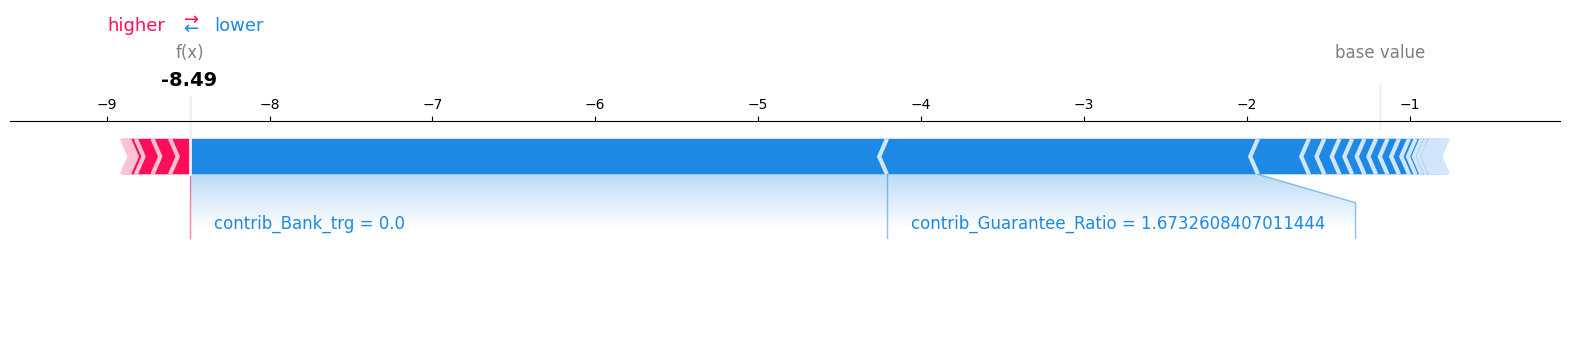

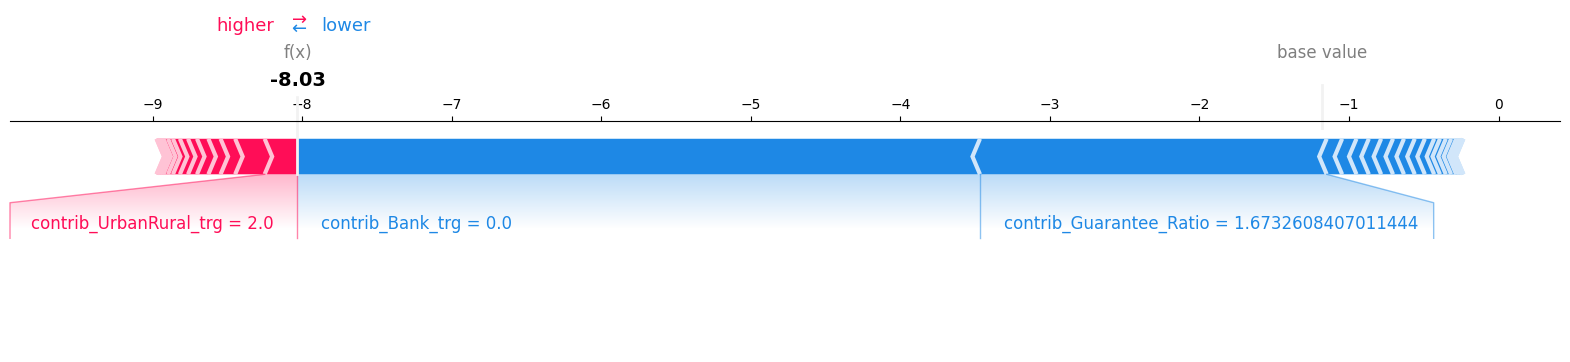

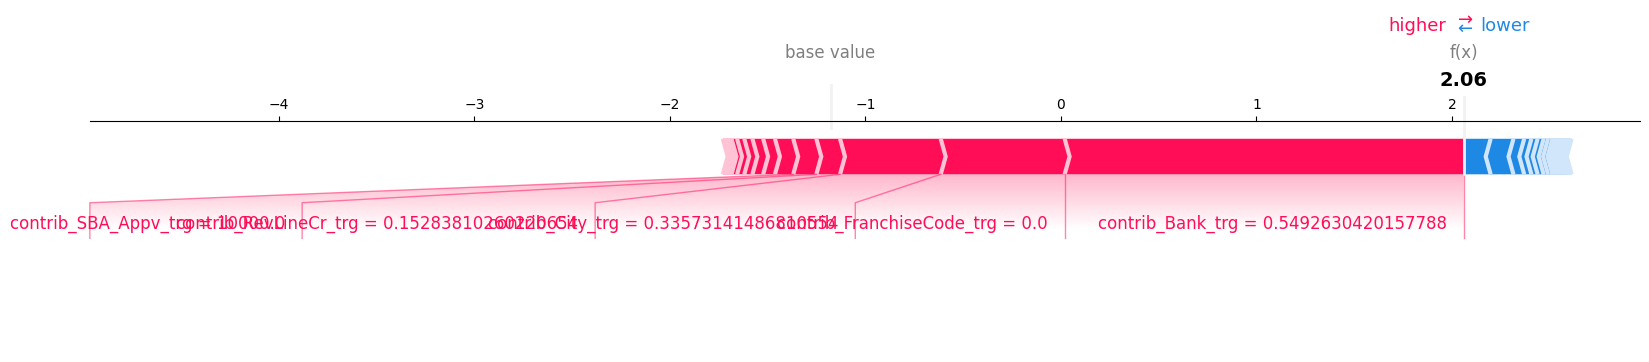

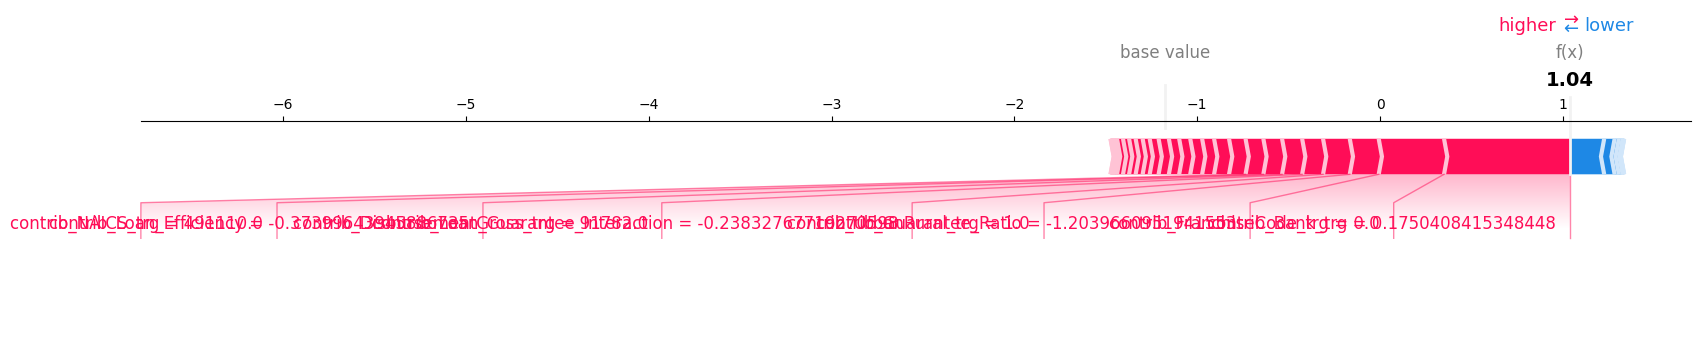

IndexError: single positional indexer is out-of-bounds

In [103]:
print(scoring(X_test))

In [ ]:
df2 = pd.read_csv("D:/Work/Gre/UTD/Courses/Fall/MIS6341/Softwares/Python/ml-fall-2023/Project2/SBA_loans_project_2_holdout_students_valid.csv")


In [ ]:
print(scoring(df2))

       index  label  probability_0  probability_1  threshold
0          0      1       0.500004       0.499996   0.505051
1          1      0       0.736423       0.263577   0.505051
2          2      1       0.500004       0.499996   0.505051
3          3      0       0.639853       0.360147   0.505051
4          4      0       0.539377       0.460623   0.505051
...      ...    ...            ...            ...        ...
98904  98904      0       0.746682       0.253318   0.505051
98905  98905      0       0.737303       0.262697   0.505051
98906  98906      1       0.500004       0.499996   0.505051
98907  98907      1       0.500004       0.499996   0.505051
98908  98908      1       0.500004       0.499996   0.505051

[98909 rows x 5 columns]


In [ ]:
print(scoring(X_test))

         index  label  probability_0  probability_1  threshold
0            0      1       0.500004       0.499996   0.505051
1            1      0       0.639739       0.360261   0.505051
2            2      1       0.500004       0.499996   0.505051
3            3      0       0.789032       0.210968   0.505051
4            4      0       0.878069       0.121931   0.505051
...        ...    ...            ...            ...        ...
160046  160046      1       0.500004       0.499996   0.505051
160047  160047      0       0.745296       0.254704   0.505051
160048  160048      0       0.749889       0.250111   0.505051
160049  160049      1       0.500004       0.499996   0.505051
160050  160050      0       0.641459       0.358541   0.505051

[160051 rows x 5 columns]


In [ ]:
print(scoring(df2[100:200]))

    index  label  probability_0  probability_1  threshold
0     100      0       0.852914       0.147086   0.505051
1     101      0       0.852942       0.147058   0.505051
2     102      0       0.749898       0.250102   0.505051
3     103      0       0.692439       0.307561   0.505051
4     104      0       0.819329       0.180671   0.505051
5     105      0       0.568328       0.431672   0.505051
6     106      1       0.500004       0.499996   0.505051
7     107      0       0.745293       0.254707   0.505051
8     108      0       0.852912       0.147088   0.505051
9     109      0       0.747600       0.252400   0.505051
10    110      0       0.694358       0.305642   0.505051
11    111      0       0.852914       0.147086   0.505051
12    112      0       0.746689       0.253311   0.505051
13    113      0       0.750847       0.249153   0.505051
14    114      1       0.500004       0.499996   0.505051
15    115      0       0.751205       0.248795   0.505051
16    116     